In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Genre_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Sub_Genre_df.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS

In [3]:
pd.set_option('display.max_rows', None)  # Örneğin, ilk 100 satırı göster
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)  # Örneğin, ilk 20 sütunu göster

In [4]:
df_1 = pd.read_csv("/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv", sep=",")
df_1.head(30)

Unnamed: 0                                              Title  \
0            0              The Complete Novel of Sherlock Holmes   
1            1  Black Holes (L) : The Reith Lectures [Paperbac...   
2            2                                    The Kite Runner   
3            3  Greenlights: Raucous stories and outlaw wisdom...   
4            4  The Science of Storytelling: Why Stories Make ...   
5            5  Fantastic Beasts and Where to Find Them: The O...   
6            6  Fantastic Beasts: The Crimes of Grindelwald - ...   
7            7  Desperately Seeking Shah Rukh : India's Lonely...   
8            8  Save the Cat!: The Last Book on Screenwriting ...   
9            9                                         Screenplay   
10          10                                            One Day   
11          11                   SACH KAHUN TOH: AN AUTOBIOGRAPHY   
12          12                          A PRINCESS REMEMBERS (PB)   
13          13                               The Anatomy of Story   
14          14                  Studio Ghibli: The Complete Works   
15          15  Story: Style, Structure, Substance, and the Pr...   
16          16  Greenlights: Raucous stories and outlaw wisdom...   
17          17                                          BRUCE LEE   
18          18                               JOURNEYS IN THE WILD   
19          19        Speaking Of Films (The Penguin Ray Library)   
20          20            Jadunama: Javed Akhtar Ek Safar (Hindi)   
21          21           Satyajit Ray Miscellany: On Life, Cinema   
22          22  Unscripted: Conversations on Life and Ci: Conv...   
23          23  FANTASTIC BEASTS: THE SECRETS OF DUMBLEDORE � ...   
24          24                Conversations with Mani Ratnam (PB)   
25          25                                          Hitchcock   
26          26  Indian Cinema: A Very Short Introduction (Very...   
27          27  Basu Chatterji And Middle-of-the-Road Ci: And ...   
28          28  Changing The Lens: Exploring The Depths Of Fil...   
29          29                         This Life at Play: Memoirs   

                               Author                Main Genre  \
0                  Arthur Conan Doyle  Arts, Film & Photography   
1                     Stephen Hawking  Arts, Film & Photography   
2                     Khaled Hosseini  Arts, Film & Photography   
3                 Matthew McConaughey  Arts, Film & Photography   
4                          Will Storr  Arts, Film & Photography   
5                        J.K. Rowling  Arts, Film & Photography   
6                        J.K. Rowling  Arts, Film & Photography   
7               Shrayana Bhattacharya  Arts, Film & Photography   
8                        Blake Snyder  Arts, Film & Photography   
9                           Syd Field  Arts, Film & Photography   
10                     David Nicholls  Arts, Film & Photography   
11                        NEENA GUPTA  Arts, Film & Photography   
12                   Maharani Gayatri  Arts, Film & Photography   
13                         John Truby  Arts, Film & Photography   
14                      Studio Ghibli  Arts, Film & Photography   
15                       Robert McKee  Arts, Film & Photography   
16                Matthew McConaughey  Arts, Film & Photography   
17                      Matthew Polly  Arts, Film & Photography   
18             Sir David Attenborough  Arts, Film & Photography   
19                       Satyajit Ray  Arts, Film & Photography   
20                     Arvind Mandloi  Arts, Film & Photography   
21                       Satyajit Ray  Arts, Film & Photography   
22                      Abhijat Joshi  Arts, Film & Photography   
23                       J.K. Rowling  Arts, Film & Photography   
24                    Baradwaj Rangan  Arts, Film & Photography   
25                  Francois Truffaut  Arts, Film & Photography   
26                Ashish Rajadhyaksha  Arts, Film & Pho

In [5]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
         'COLUMNS': dataframe.columns,
         'INDEX': dataframe.index,
         'VALUE TYPES': dataframe.dtypes,
         'DUPLICATED VALUES': dataframe.duplicated().sum(),
         'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
         'ANY MISSING VALUES': dataframe.isnull().values.any(),
         'MISSING VALUES': dataframe.isnull().sum(),
         'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')

check_detail(dataframe=df_1)

--------------------------- SHAPE ---------------------------
(7928, 10)
--------------------------- COLUMNS ---------------------------
Index(['Unnamed: 0', 'Title', 'Author', 'Main Genre', 'Sub Genre', 'Type',
       'Price', 'Rating', 'No. of People rated', 'URLs'],
      dtype='object')
--------------------------- INDEX ---------------------------
RangeIndex(start=0, stop=7928, step=1)
--------------------------- VALUE TYPES ---------------------------
Unnamed: 0               int64
Title                   object
Author                  object
Main Genre              object
Sub Genre               object
Type                    object
Price                   object
Rating                 float64
No. of People rated    float64
URLs                    object
dtype: object
--------------------------- DUPLICATED VALUES ---------------------------
0
--------------------------- NUMBER OF UNIQUE VALUES ---------------------------
Unnamed: 0             7928
Title                  5740
Aut

In [6]:
df = df_1[(df_1['Rating'] != 0) & (df_1['Price'] != 0)]

In [7]:
# 'Unnamed: 0' olan kolonu kaldır
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7622 entries, 0 to 7927
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                7622 non-null   object 
 1   Author               7601 non-null   object 
 2   Main Genre           7622 non-null   object 
 3   Sub Genre            7622 non-null   object 
 4   Type                 7622 non-null   object 
 5   Price                7622 non-null   object 
 6   Rating               7622 non-null   float64
 7   No. of People rated  7622 non-null   float64
 8   URLs                 7622 non-null   object 
dtypes: float64(2), object(7)
memory usage: 595.5+ KB


In [9]:
df.head(30)

Title                  Author  \
0               The Complete Novel of Sherlock Holmes      Arthur Conan Doyle   
1   Black Holes (L) : The Reith Lectures [Paperbac...         Stephen Hawking   
2                                     The Kite Runner         Khaled Hosseini   
3   Greenlights: Raucous stories and outlaw wisdom...     Matthew McConaughey   
4   The Science of Storytelling: Why Stories Make ...              Will Storr   
5   Fantastic Beasts and Where to Find Them: The O...            J.K. Rowling   
6   Fantastic Beasts: The Crimes of Grindelwald - ...            J.K. Rowling   
7   Desperately Seeking Shah Rukh : India's Lonely...   Shrayana Bhattacharya   
8   Save the Cat!: The Last Book on Screenwriting ...            Blake Snyder   
9                                          Screenplay               Syd Field   
10                                            One Day          David Nicholls   
11                   SACH KAHUN TOH: AN AUTOBIOGRAPHY             NEENA GUPTA   
12                          A PRINCESS REMEMBERS (PB)        Maharani Gayatri   
13                               The Anatomy of Story              John Truby   
14                  Studio Ghibli: The Complete Works           Studio Ghibli   
15  Story: Style, Structure, Substance, and the Pr...            Robert McKee   
16  Greenlights: Raucous stories and outlaw wisdom...     Matthew McConaughey   
17                                          BRUCE LEE           Matthew Polly   
18                               JOURNEYS IN THE WILD  Sir David Attenborough   
19        Speaking Of Films (The Penguin Ray Library)            Satyajit Ray   
20            Jadunama: Javed Akhtar Ek Safar (Hindi)          Arvind Mandloi   
21           Satyajit Ray Miscellany: On Life, Cinema            Satyajit Ray   
22  Unscripted: Conversations on Life and Ci: Conv...           Abhijat Joshi   
23  FANTASTIC BEASTS: THE SECRETS OF DUMBLEDORE � ...            J.K. Rowling   
24                Conversations with Mani Ratnam (PB)         Baradwaj Rangan   
25                                          Hitchcock       Francois Truffaut   
26  Indian Cinema: A Very Short Introduction (Very...     Ashish Rajadhyaksha   
27  Basu Chatterji And Middle-of-the-Road Ci: And ...  Anirudha Bhattacharjee   
29                         This Life at Play: Memoirs           Girish Karnad   
30  The Supernatural Quiz Book: 500 Questions and ...      Light Bulb Quizzes   

                  Main Genre           Sub Genre               Type  \
0   Arts, Film & Photography  Cinema & Broadcast          Paperback   
1   Arts, Film & Photography  Cinema & Broadcast          Paperback   
2   Arts, Film & Photography  Cinema & Broadcast     Kindle Edition   
3   Arts, Film & Photography  Cinema & Broadcast          Paperback   
4   Arts, Film & Photography  Cinema & Broadcast          Paperback   
5   Arts, Film & Photography  Cinema & Broadcast     Kindle Edition   
6   Arts, Film & Photography  Cinema & Broadcast     Kindle Edition   
7   Arts, Film & Photography  Cinema & Broadcast          Paperback   
8   Arts, Film & Photography  Cinema & Broadcast          Paperback   
9   Arts, Film & Photography  Cinema & Broadcast          Paperback   
10  Arts, Film & Photography  Cinema & Broadcast  Audible Audiobook   
11  Arts, Film & Photography  Cinema & Broadcast          Hardcover   
12  Arts, Film & Photography  Cinema & Broadcast          Paperback   
13  Arts, Film & Photography  Cinema & Broadcast          Paperback   
14  Arts, Film & Photography  Cinema & Broadcast          Hardcover   
15  Arts, Film & Photography  Cinema & Broadcast          Hardcover   
16  Arts, Film & Photography  Cinema & Broadcast     Kindle Edition   
17  Arts, Film & Photography  Cinema & Broadcast          Paperback   
18  Arts, Film & Photography  Cinema & Broadcast          Paperback   
19  Arts, Film & Photography  Cinema & Broadcast          Paperback   
20  Arts, Film & Photography  Cinema & Broadc

In [10]:
# Price daki para birimi işaretini kaldır
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

df.head()

Title               Author  \
0              The Complete Novel of Sherlock Holmes   Arthur Conan Doyle   
1  Black Holes (L) : The Reith Lectures [Paperbac...      Stephen Hawking   
2                                    The Kite Runner      Khaled Hosseini   
3  Greenlights: Raucous stories and outlaw wisdom...  Matthew McConaughey   
4  The Science of Storytelling: Why Stories Make ...           Will Storr   

                 Main Genre           Sub Genre            Type   Price  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback 169.000   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback  99.000   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition 175.750   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback 389.000   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback 348.160   

   Rating  No. of People rated  \
0   4.400            19923.000   
1   4.500             7686.000   
2   4.600            50016.000   
3   4.600            32040.000   
4   4.500             1707.000   

                                                URLs  
0  https://www.amazon.in/Complete-Novels-Sherlock...  
1  https://www.amazon.in/Black-Holes-Lectures-Ste...  
2  https://www.amazon.in/Kite-Runner-Khaled-Hosse...  
3  https://www.amazon.in/Greenlights-Raucous-stor...  
4  https://www.amazon.in/Science-Storytelling-Wil...

In [11]:
# Eksikleri kontrol et
missing_values = df.isnull().sum()
missing_values

Title                   0
Author                 21
Main Genre              0
Sub Genre               0
Type                    0
Price                   0
Rating                  0
No. of People rated     0
URLs                    0
dtype: int64

In [12]:
# Check datatypes of all columns after initial cleanup
dtypes_after_cleanup = df.dtypes

missing_values, dtypes_after_cleanup

(Title                   0
 Author                 21
 Main Genre              0
 Sub Genre               0
 Type                    0
 Price                   0
 Rating                  0
 No. of People rated     0
 URLs                    0
 dtype: int64,
 Title                   object
 Author                  object
 Main Genre              object
 Sub Genre               object
 Type                    object
 Price                  float64
 Rating                 float64
 No. of People rated    float64
 URLs                    object
 dtype: object)

In [13]:
# Yazardaki boşlukları Unknown ile doldur
df['Author'].fillna('Unknown', inplace=True)

In [14]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

count     mean       std   min    0%     5%     50%  \
Price               7622.000  484.764   914.161 0.010 0.010 89.000 314.250   
Rating              7622.000    4.432     0.323 1.000 1.000  3.900   4.500   
No. of People rated 7622.000 6739.438 22482.901 1.000 1.000  4.000 570.000   

                          95%        99%       100%        max  
Price                1441.000   3387.010  35829.000  35829.000  
Rating                  4.800      5.000      5.000      5.000  
No. of People rated 31075.150 106339.140 500119.000 500119.000

In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "No. of People rated")

(-46602.72499999998, 77681.87499999996)

In [16]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "No. of People rated")

True

In [17]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7622
Variables: 9
cat_cols: 0
num_cols: 3
cat_but_car: 6
num_but_cat: 0


In [18]:
for col in num_cols:
    print(col, check_outlier(df, col))

Price True
Rating True
No. of People rated True


In [19]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "No. of People rated")

                                                 Title               Author  \
76                             Daisy Jones and The Six  Taylor Jenkins Reid   
100  Harry Potter and the Cursed Child - Parts One ...         J.K. Rowling   
152  The Silent Patient: The record-breaking, multi...     Alex Michaelides   
250  Man's Search For Meaning: The classic tribute ...     Victor E. Frankl   
275  Man's Search For Meaning: The classic tribute ...      Viktor E Frankl   

                               Main Genre           Sub Genre  \
76               Arts, Film & Photography               Music   
100              Arts, Film & Photography    Theater & Ballet   
152              Arts, Film & Photography  Theory & Criticism   
250  Biographies, Diaries & True Accounts       True Accounts   
275  Biographies, Diaries & True Accounts       True Accounts   

                                Type   Price  Rating  No. of People rated  \
76                         Paperback 334.000   4.300     

In [20]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

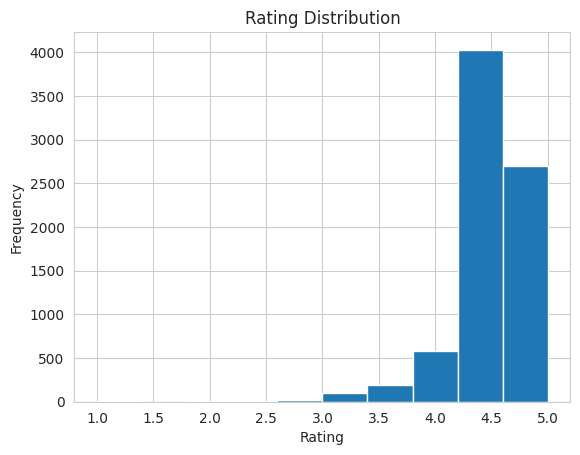

In [21]:
# Rating dağılımını görselleştirme
df['Rating'].hist(bins=10)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

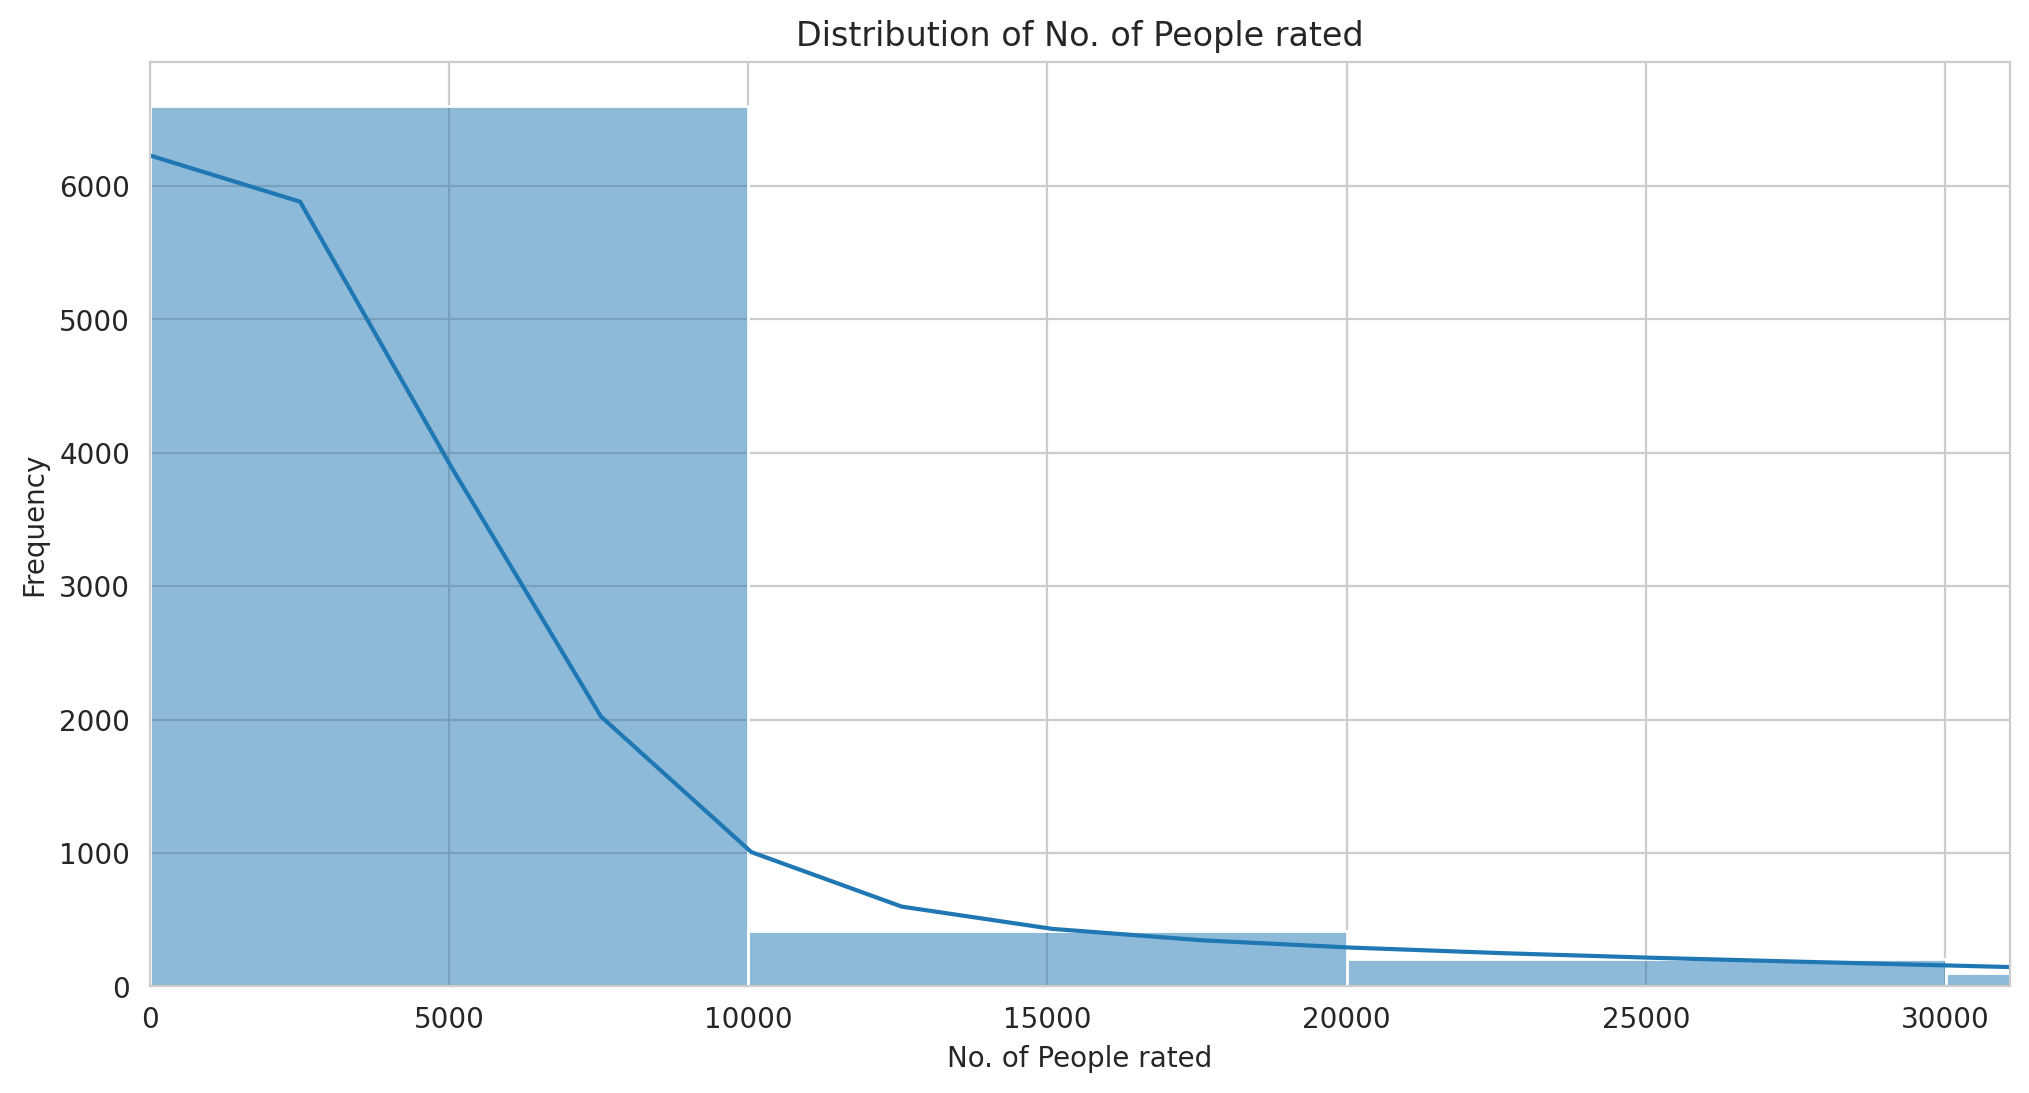

In [22]:
# 'Derecelendirilen Kişi Sayısı'nın dağılımı
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(df['No. of People rated'], bins=50, kde=True)
plt.title('Distribution of No. of People rated')
plt.xlabel('No. of People rated')
plt.ylabel('Frequency')
plt.xlim(0, df['No. of People rated'].quantile(0.95)) # Limiting x-axis to 95th percentile for better visualization
plt.show()

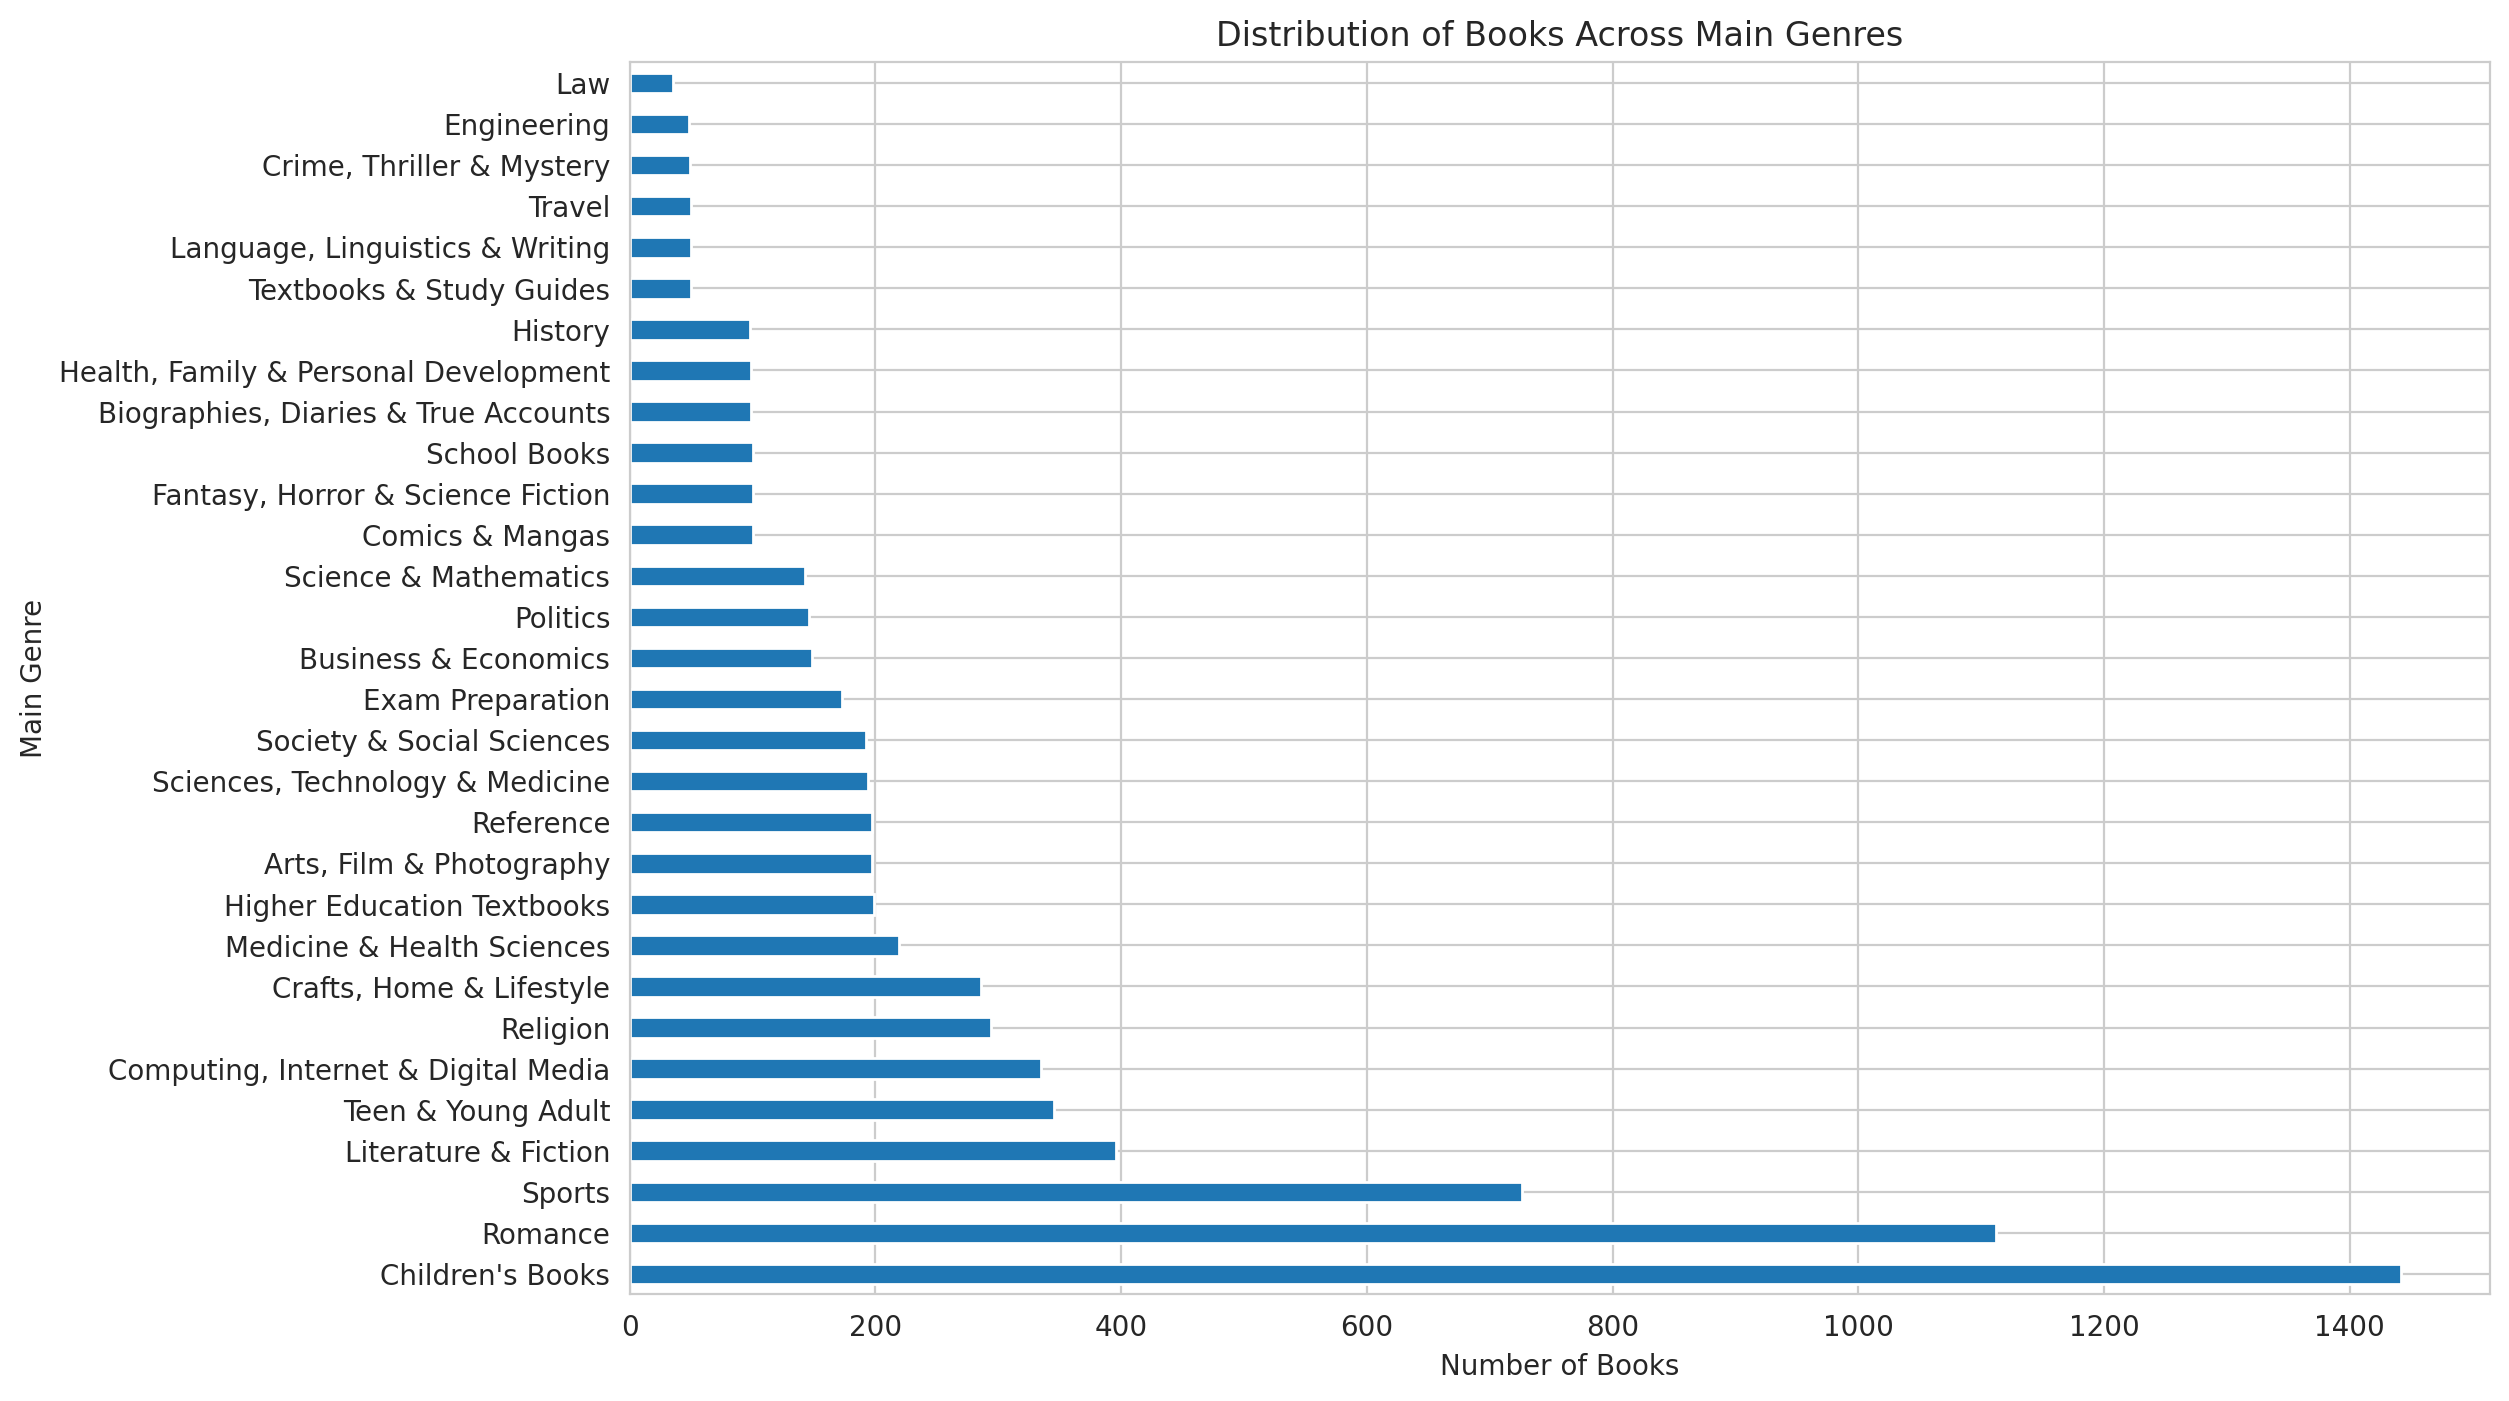

In [23]:
# Farklı Ana Türlere Göre Kitapların Dağılımı
plt.figure(figsize=(12, 8), dpi=200)
df['Main Genre'].value_counts().plot(kind='barh')
plt.title('Distribution of Books Across Main Genres')
plt.xlabel('Number of Books')
plt.ylabel('Main Genre')
plt.show()


In [24]:
# Türler arasındaki derecelendirme farkını inceleme
rating_range_by_genre = df.groupby('Main Genre')['Rating'].agg(['min', 'max', 'mean'])
print(rating_range_by_genre)

                                        min   max  mean
Main Genre                                             
Arts, Film & Photography              2.700 5.000 4.477
Biographies, Diaries & True Accounts  3.900 5.000 4.549
Business & Economics                  3.000 5.000 4.441
Children's Books                      3.100 5.000 4.523
Comics & Mangas                       3.700 4.900 4.480
Computing, Internet & Digital Media   2.000 5.000 4.356
Crafts, Home & Lifestyle              3.000 5.000 4.422
Crime, Thriller & Mystery             3.700 5.000 4.341
Engineering                           3.300 5.000 4.358
Exam Preparation                      1.800 5.000 4.266
Fantasy, Horror & Science Fiction     3.400 5.000 4.454
Health, Family & Personal Development 4.000 4.800 4.461
Higher Education Textbooks            3.400 5.000 4.450
History                               3.900 5.000 4.480
Language, Linguistics & Writing       3.600 4.800 4.418
Law                                   3.000 5.00

In [25]:
# Derecelendirmeye göre türlerin sıralanması
sorted_genres_by_rating = df.groupby('Main Genre')['Rating'].mean().sort_values()
print(sorted_genres_by_rating)

Main Genre
Exam Preparation                        4.266
Romance                                 4.333
Sports                                  4.333
Crime, Thriller & Mystery               4.341
Computing, Internet & Digital Media     4.356
Travel                                  4.358
Engineering                             4.358
Textbooks & Study Guides                4.372
Medicine & Health Sciences              4.393
Law                                     4.400
Science & Mathematics                   4.401
Language, Linguistics & Writing         4.418
Crafts, Home & Lifestyle                4.422
Sciences, Technology & Medicine         4.428
Reference                               4.430
Business & Economics                    4.441
School Books                            4.446
Higher Education Textbooks              4.450
Fantasy, Horror & Science Fiction       4.454
Literature & Fiction                    4.457
Health, Family & Personal Development   4.461
Arts, Film & Photograph

In [26]:
# Her tür için en yüksek ve en düşük derecelendirmeleri bulma
highest_ratings = df.loc[df.groupby('Main Genre')['Rating'].idxmax()]
lowest_ratings = df.loc[df.groupby('Main Genre')['Rating'].idxmin()]

In [27]:
print("Highest Ratings:\n", highest_ratings)
print("Lowest Ratings:\n", lowest_ratings)

Highest Ratings:
                                                   Title  \
30    The Supernatural Quiz Book: 500 Questions and ...   
201   Chautha Ank'Autobiography Ravindra Mahajani चौ...   
400          Own Your Body: A Doctor's Life-saving Tips   
829   The Accidental Minecraft Family: Book 38: Sear...   
1979                   One Piece, Vol. 104 (Volume 104)   
2020  Machine Learning System Design Interview: An I...   
2352  The Sattvik Kitchen: The Art and Science of He...   
2664                                     INTERFAITH - 2   
2734      INTRODUCTION TO DIGITAL COMMUNICATION SYSTEMS   
2784  MAN SHAKTI VADHVA (ENERGIZED YOUR MIND) GAUR G...   
2997  Rogue Ascension: Book 5: First Ascension: A Pr...   
3063  Breakout Trading Made Easy: Maximize Your Prof...   
3152  डायरेक्ट सेलिंग का विजेता कैसे बने ? PART – 1 ...   
3401  Chautha Ank'Autobiography Ravindra Mahajani चौ...   
3472  PUBLICATION MANUAL OF THE AMERICAN PSYCHOLOGIC...   
3516  Taxmann's Companies Act with Rul

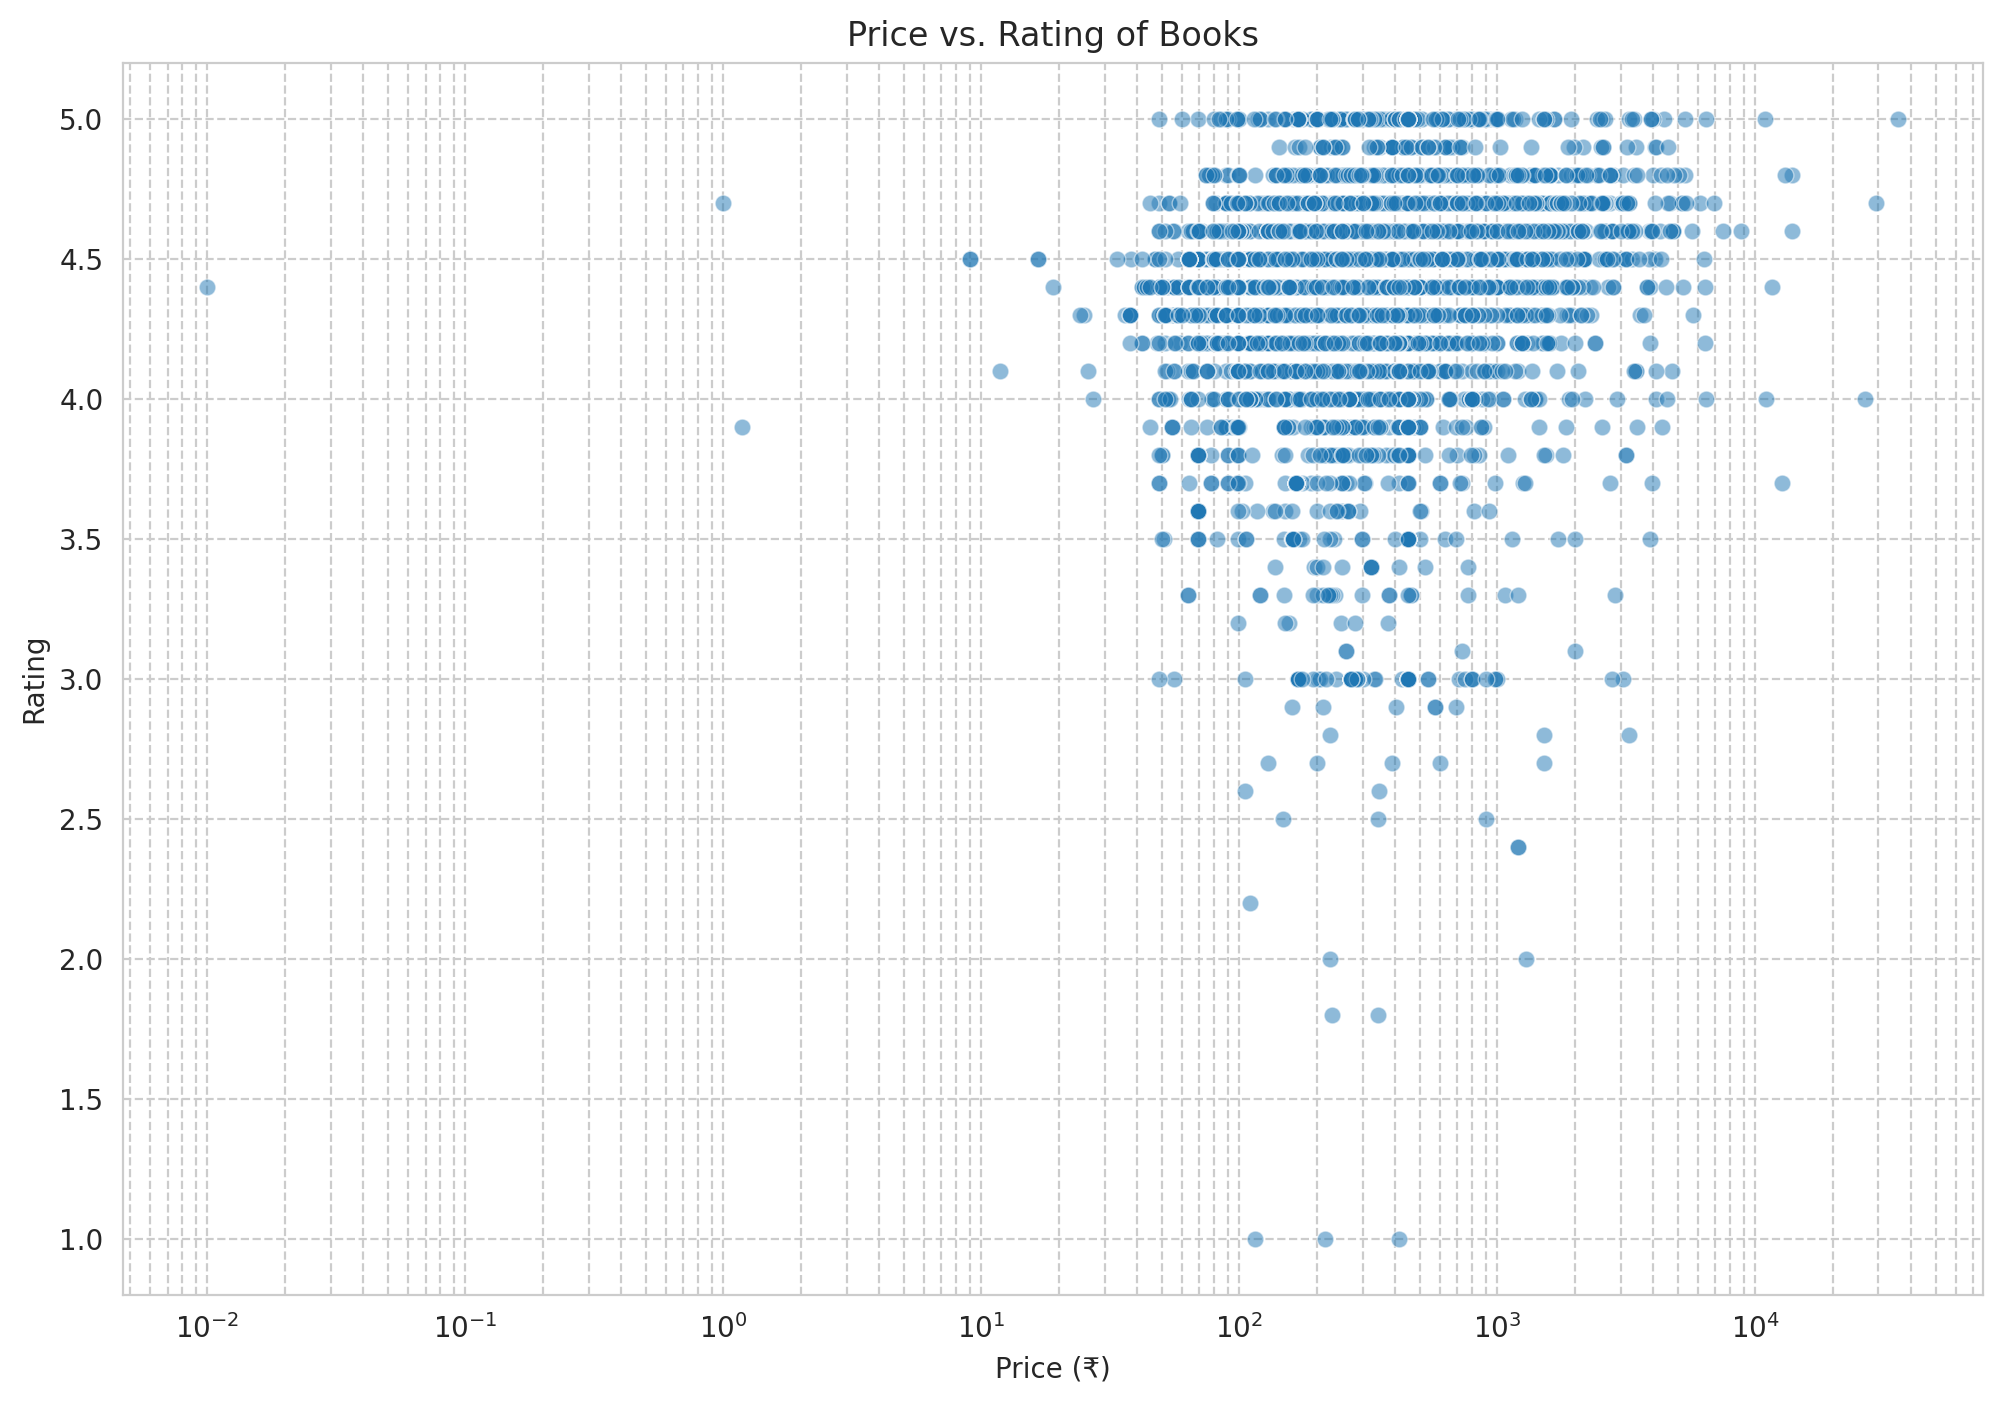

In [28]:
# Price vs. Rating Scatter Plot
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Price', y='Rating', data=df, alpha=0.5)
plt.title('Price vs. Rating of Books')
plt.xlabel('Price (₹)')
plt.ylabel('Rating')
plt.xscale('log')  # Using a logarithmic scale for better visualization of a wide range of prices
plt.grid(True, which="both", ls="--")
plt.show()

In [29]:
# Set a minimum threshold for the number of ratings to be considered for 'Best Rated Authors'
min_ratings_threshold = 1000

# Group by 'Author' and calculate mean rating, mean price, and total number of ratings
author_stats = df.groupby('Author').agg({
    'Rating': 'mean',
    'Price': 'mean',
    'No. of People rated': ['sum', 'mean']
}).reset_index()

# Flatten the multi-level column names
author_stats.columns = ['Author', 'Avg Rating', 'Avg Price', 'Total Ratings', 'Avg Ratings per Book']

# Filter authors to ensure they have a significant number of ratings for reliability
best_rated_authors = author_stats[author_stats['Avg Ratings per Book'] > min_ratings_threshold].sort_values(by='Avg Rating', ascending=False).head(10)

# Identify the most expensive authors
most_expensive_authors = author_stats.sort_values(by='Avg Price', ascending=False).head(10)

# Identify the most rated authors
most_rated_authors = author_stats.sort_values(by='Total Ratings', ascending=False).head(10)

best_rated_authors, most_expensive_authors, most_rated_authors

(                       Author  Avg Rating  Avg Price  Total Ratings  \
 1576              Joy Alukkas       5.000    464.880       1274.000   
 3231            Trent Shelton       4.900    567.000       1070.000   
 3161             Tatsuya Endo       4.900    492.000       5053.000   
 1745         L. M. Montgomery       4.900    442.690       1990.000   
 2084  Michael Dante DiMartino       4.900   2148.000       1615.000   
 698            Cori Doerrfeld       4.900    389.000      12927.000   
 493            Bret Contreras       4.900   4119.000       5120.000   
 1829       Little Tiger Press       4.900    226.000      71361.000   
 906        Dr. Aaron Horschig       4.900   4594.000       3475.000   
 1115             Frank Thomas       4.900   4079.000       1903.000   
 
       Avg Ratings per Book  
 1576              1274.000  
 3231              1070.000  
 3161              5053.000  
 1745              1990.000  
 2084              1615.000  
 698               4309.00

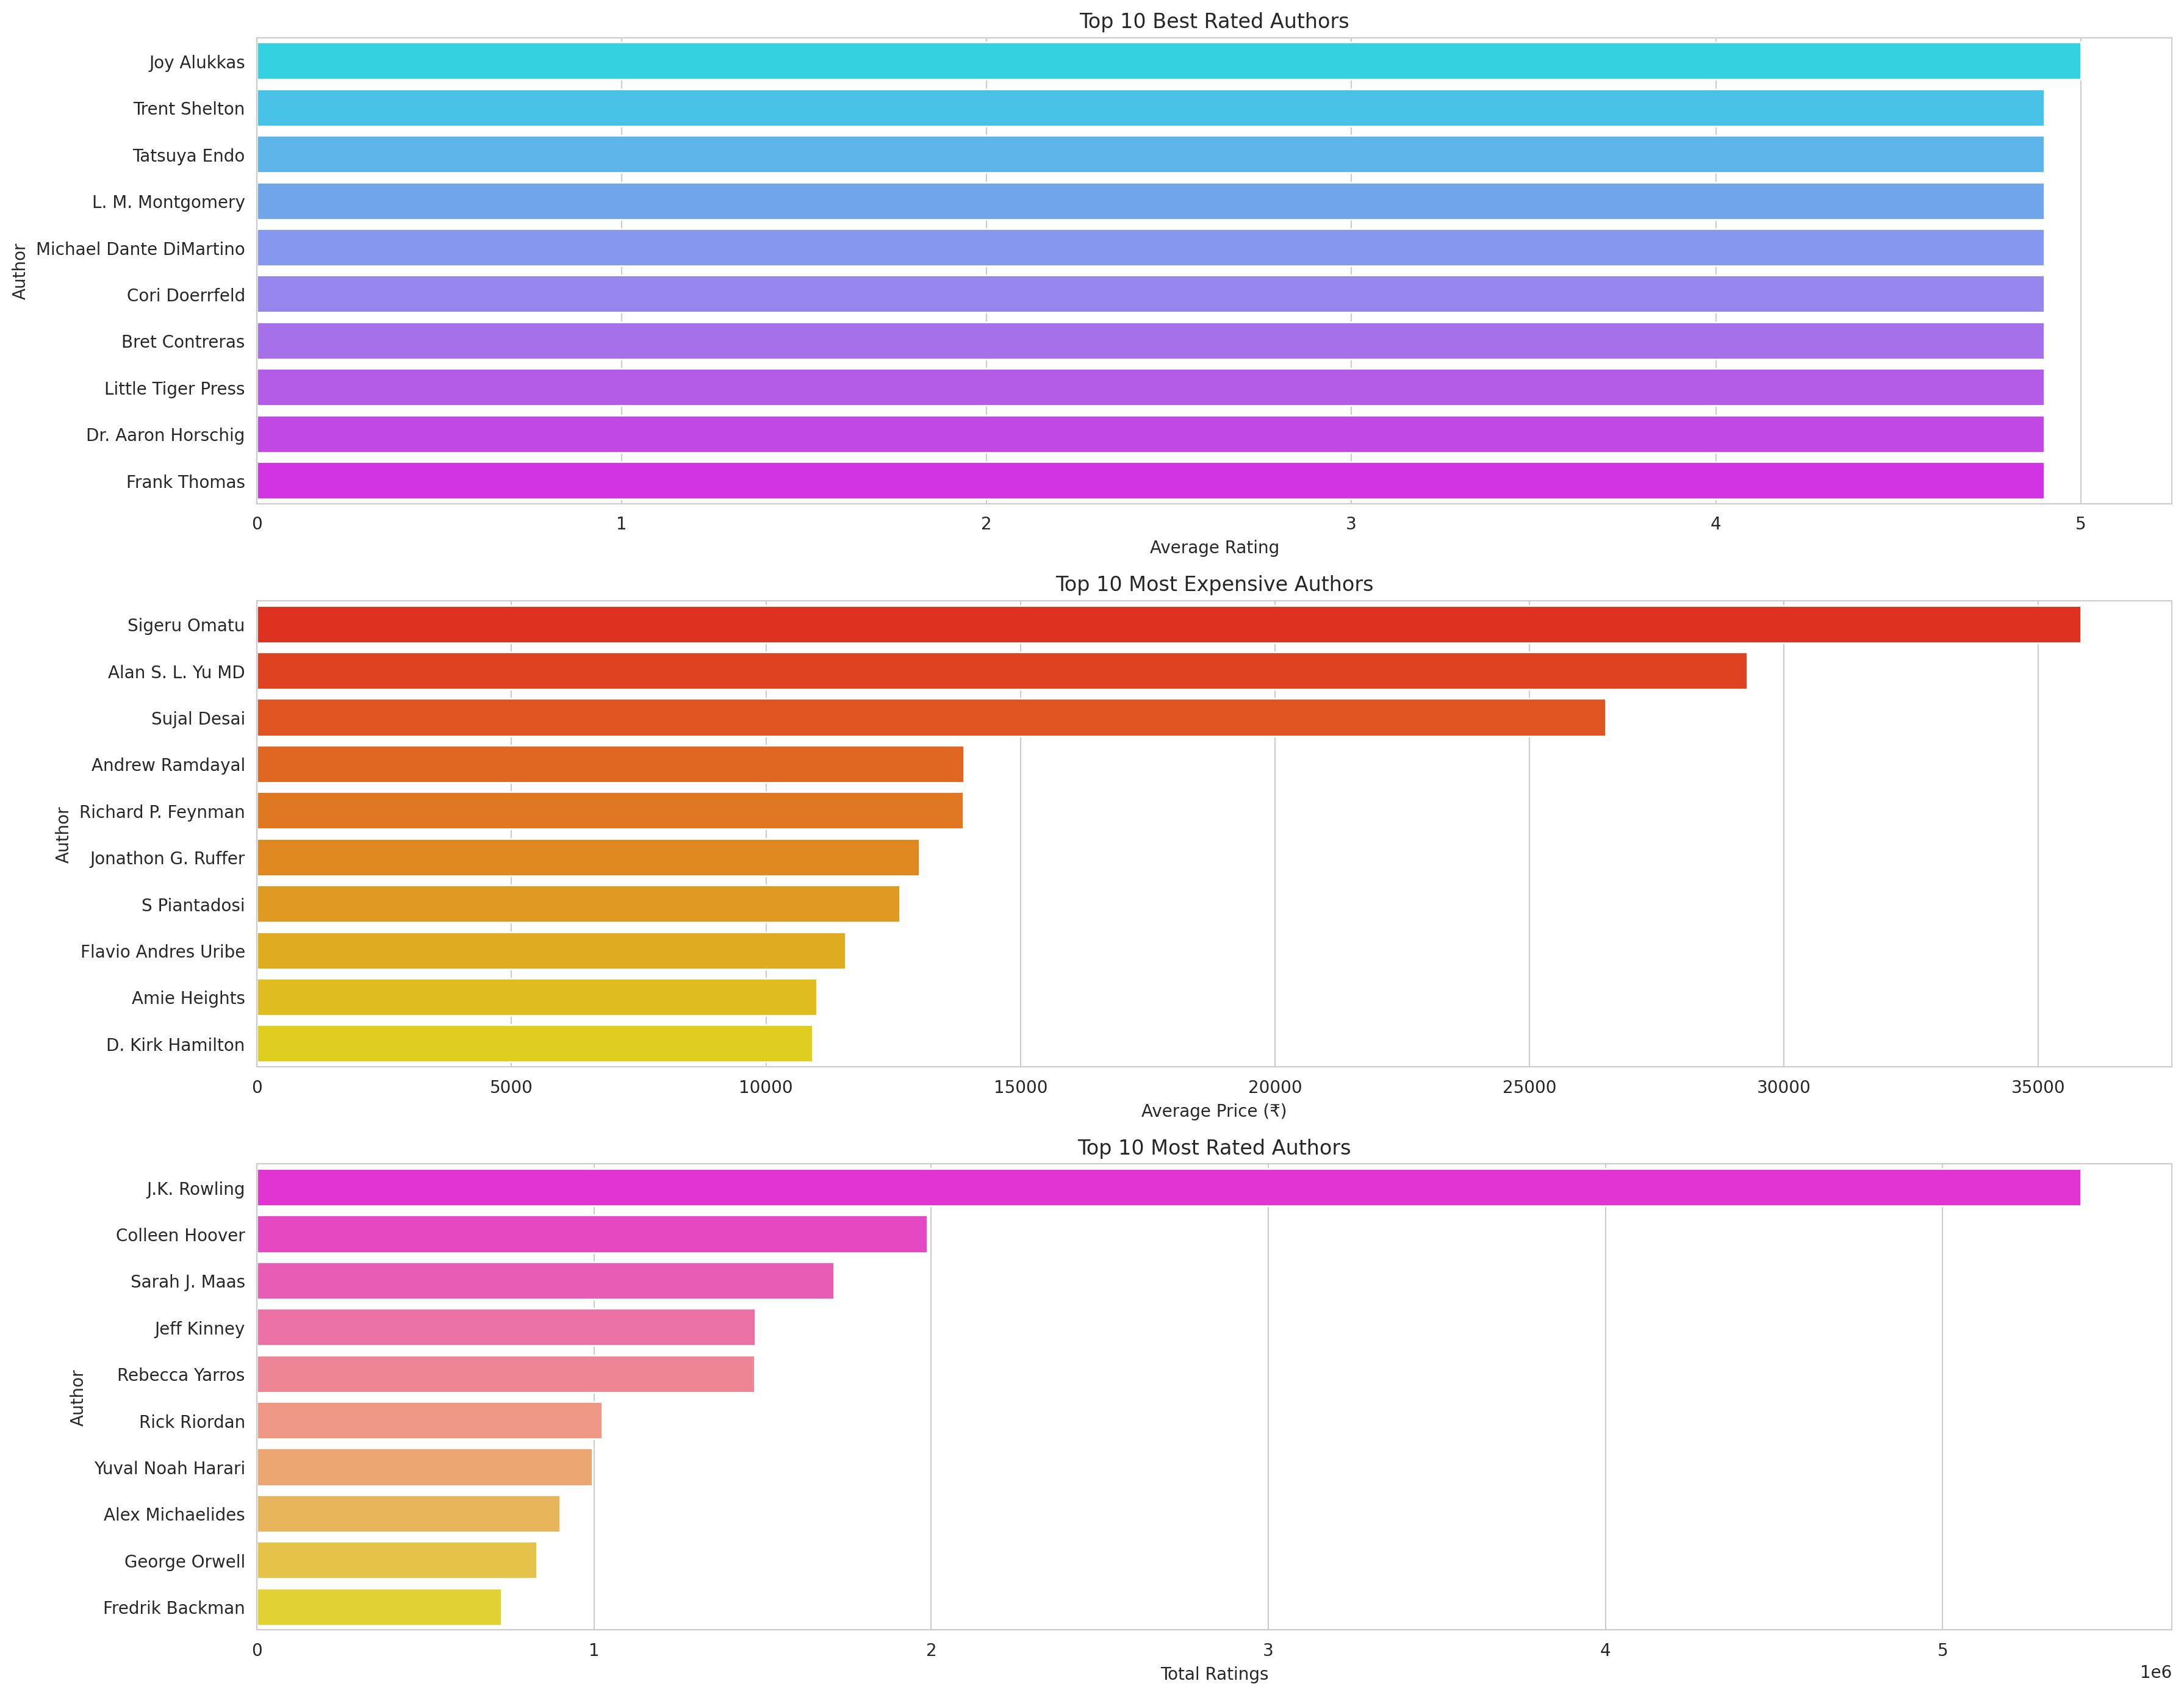

In [30]:
# Visualization setup
plt.figure(figsize=(18, 14), dpi=200)

# Best Rated Authors
plt.subplot(3, 1, 1)
sns.barplot(x='Avg Rating', y='Author', data=best_rated_authors, palette='cool')
plt.title('Top 10 Best Rated Authors')
plt.xlabel('Average Rating')
plt.ylabel('Author')

# Most Expensive Authors
plt.subplot(3, 1, 2)
sns.barplot(x='Avg Price', y='Author', data=most_expensive_authors, palette='autumn')
plt.title('Top 10 Most Expensive Authors')
plt.xlabel('Average Price (₹)')
plt.ylabel('Author')

# Most Rated Authors
plt.subplot(3, 1, 3)
sns.barplot(x='Total Ratings', y='Author', data=most_rated_authors, palette='spring')
plt.title('Top 10 Most Rated Authors')
plt.xlabel('Total Ratings')
plt.ylabel('Author')

plt.tight_layout()
plt.show()

In [31]:
#Yazar başına düşen kitap sayısı ve uretken ilk 10
books_per_author = df['Author'].value_counts().reset_index()
books_per_author.columns = ['Author', 'Number of Books']

top_authors = books_per_author.head(10)
top_authors

Author  Number of Books
0       Wonder House Books              388
1              Maple Press              110
2              Jeff Kinney               86
3             J.K. Rowling               84
4   Dreamland Publications               78
5             Team Pegasus               54
6              Sudha Murty               51
7             Rick Riordan               46
8   Oswaal Editorial Board               46
9  Om Books Editorial Team               44

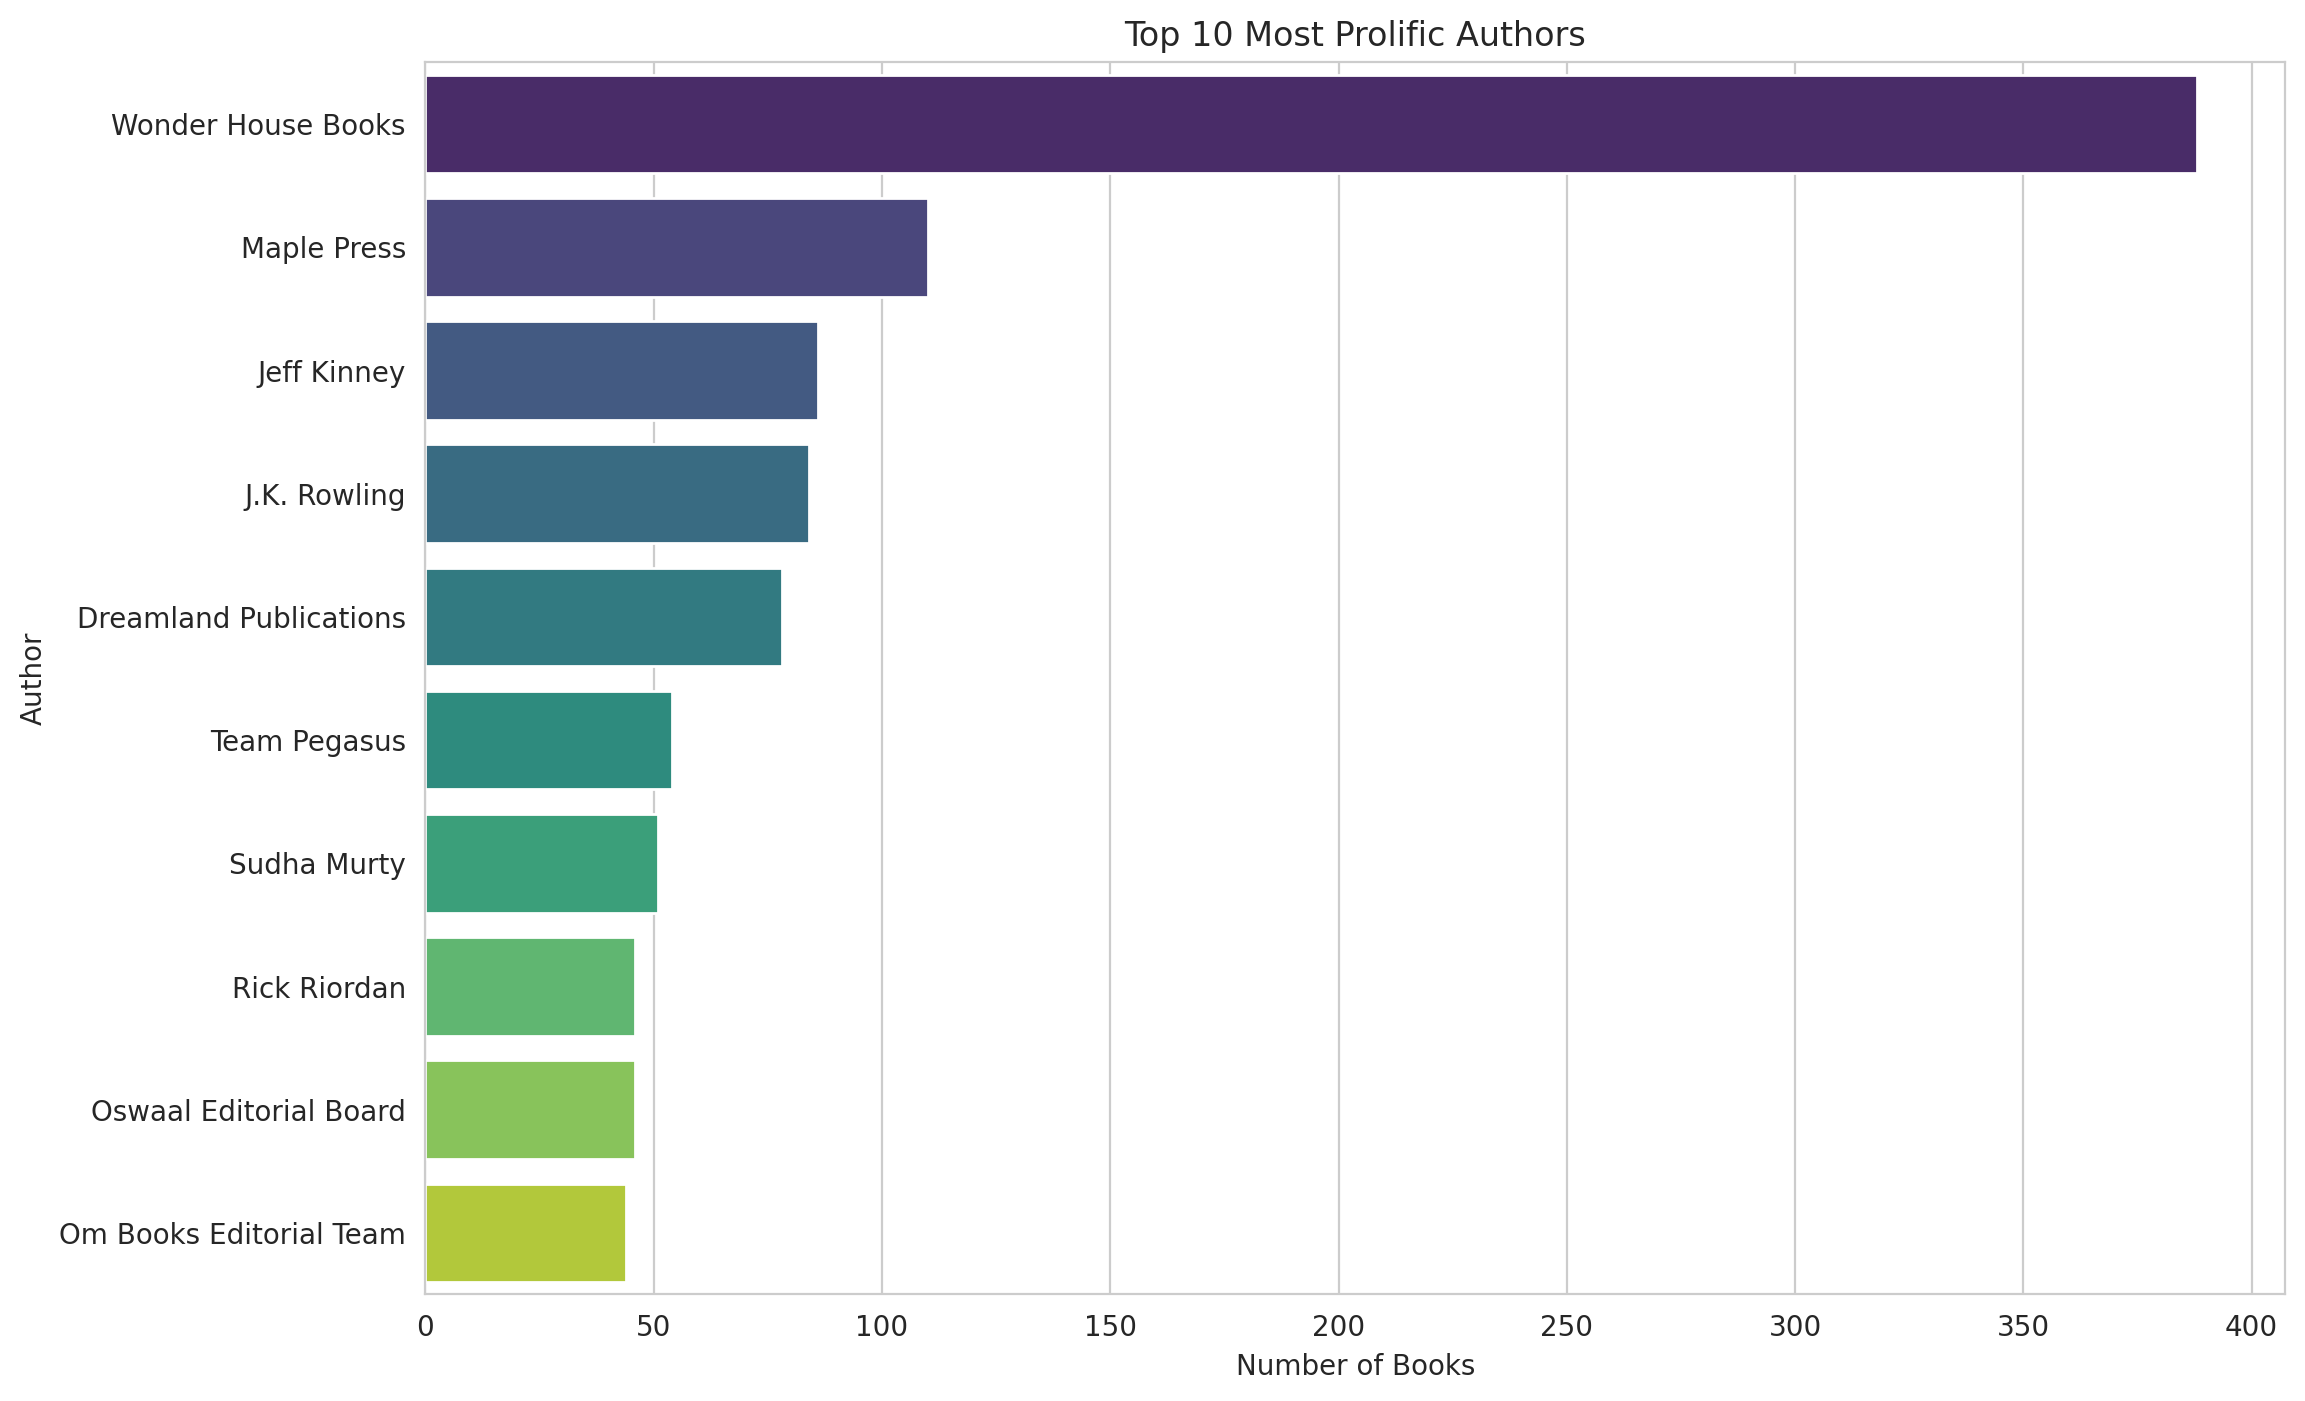

In [32]:
# Görselleştirme
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x='Number of Books', y='Author', data=top_authors, palette='viridis')
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

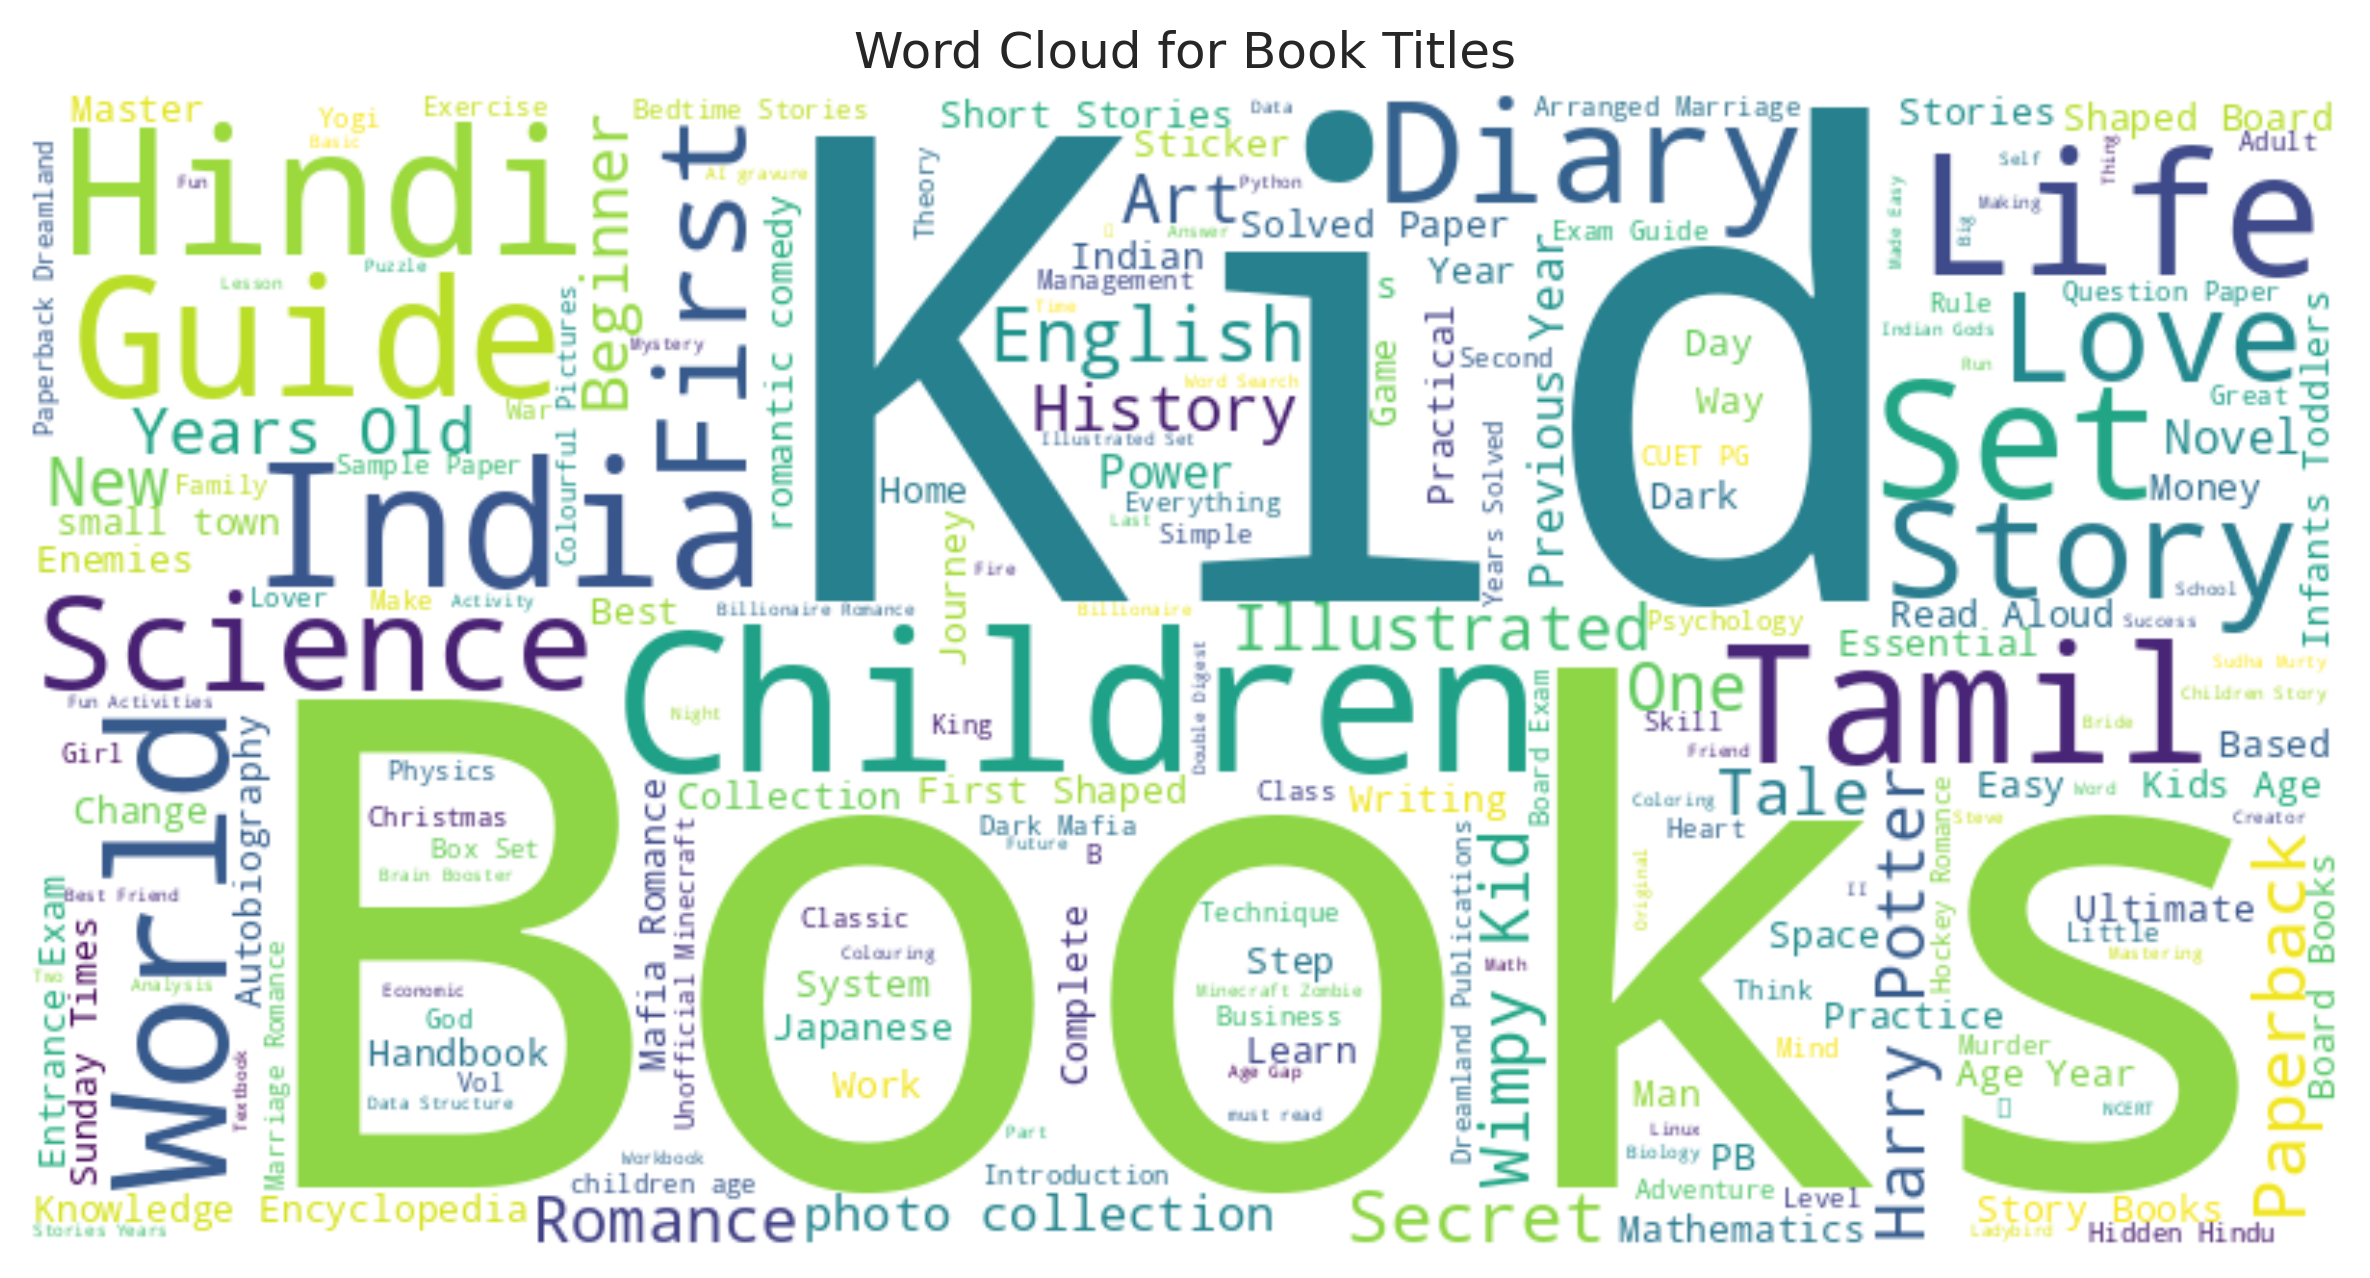

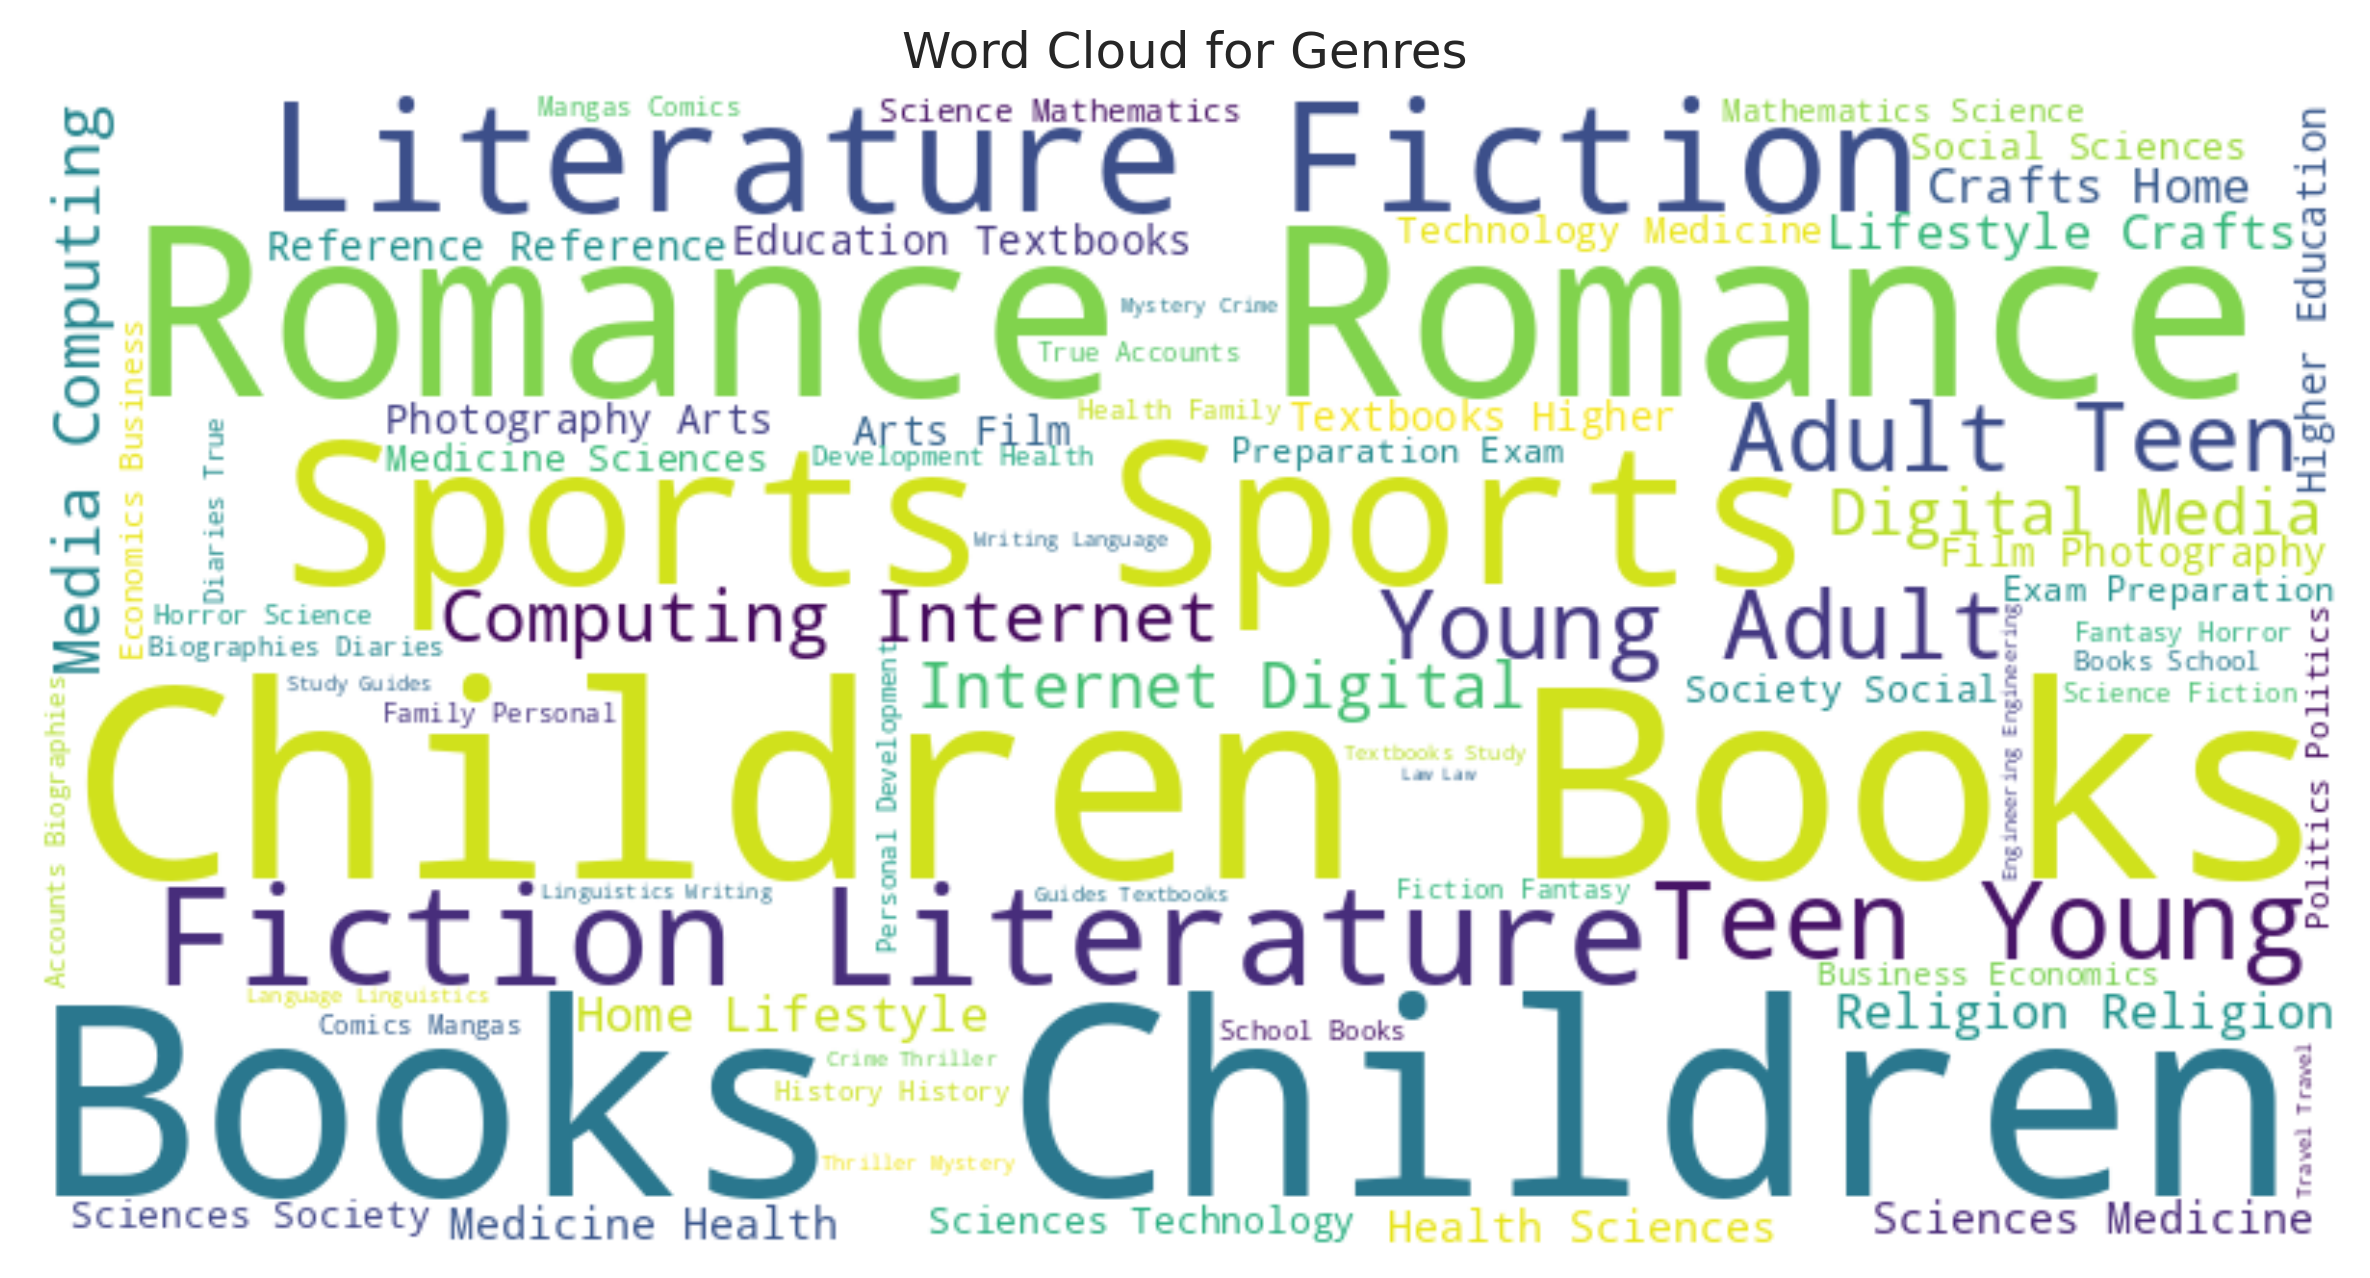

In [33]:
# Combine all book titles into a single string
all_titles = ' '.join(df['Title'])

# Combine all genres into a single string
all_genres = ' '.join(df['Main Genre'])

# Define additional stopwords to exclude common words that may not add value to the visualization
additional_stopwords = {'Edition', 'Volume', 'Series', 'Book'}

# Update the stopwords set with the additional stopwords
stopwords = set(STOPWORDS).union(additional_stopwords)

# Generate a word cloud for book titles
wordcloud_titles = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_titles)

# Generate a word cloud for genres
wordcloud_genres = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_genres)

# Plotting the word cloud for book titles
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Book Titles')
plt.show()

# Plotting the word cloud for genres
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genres')
plt.show()

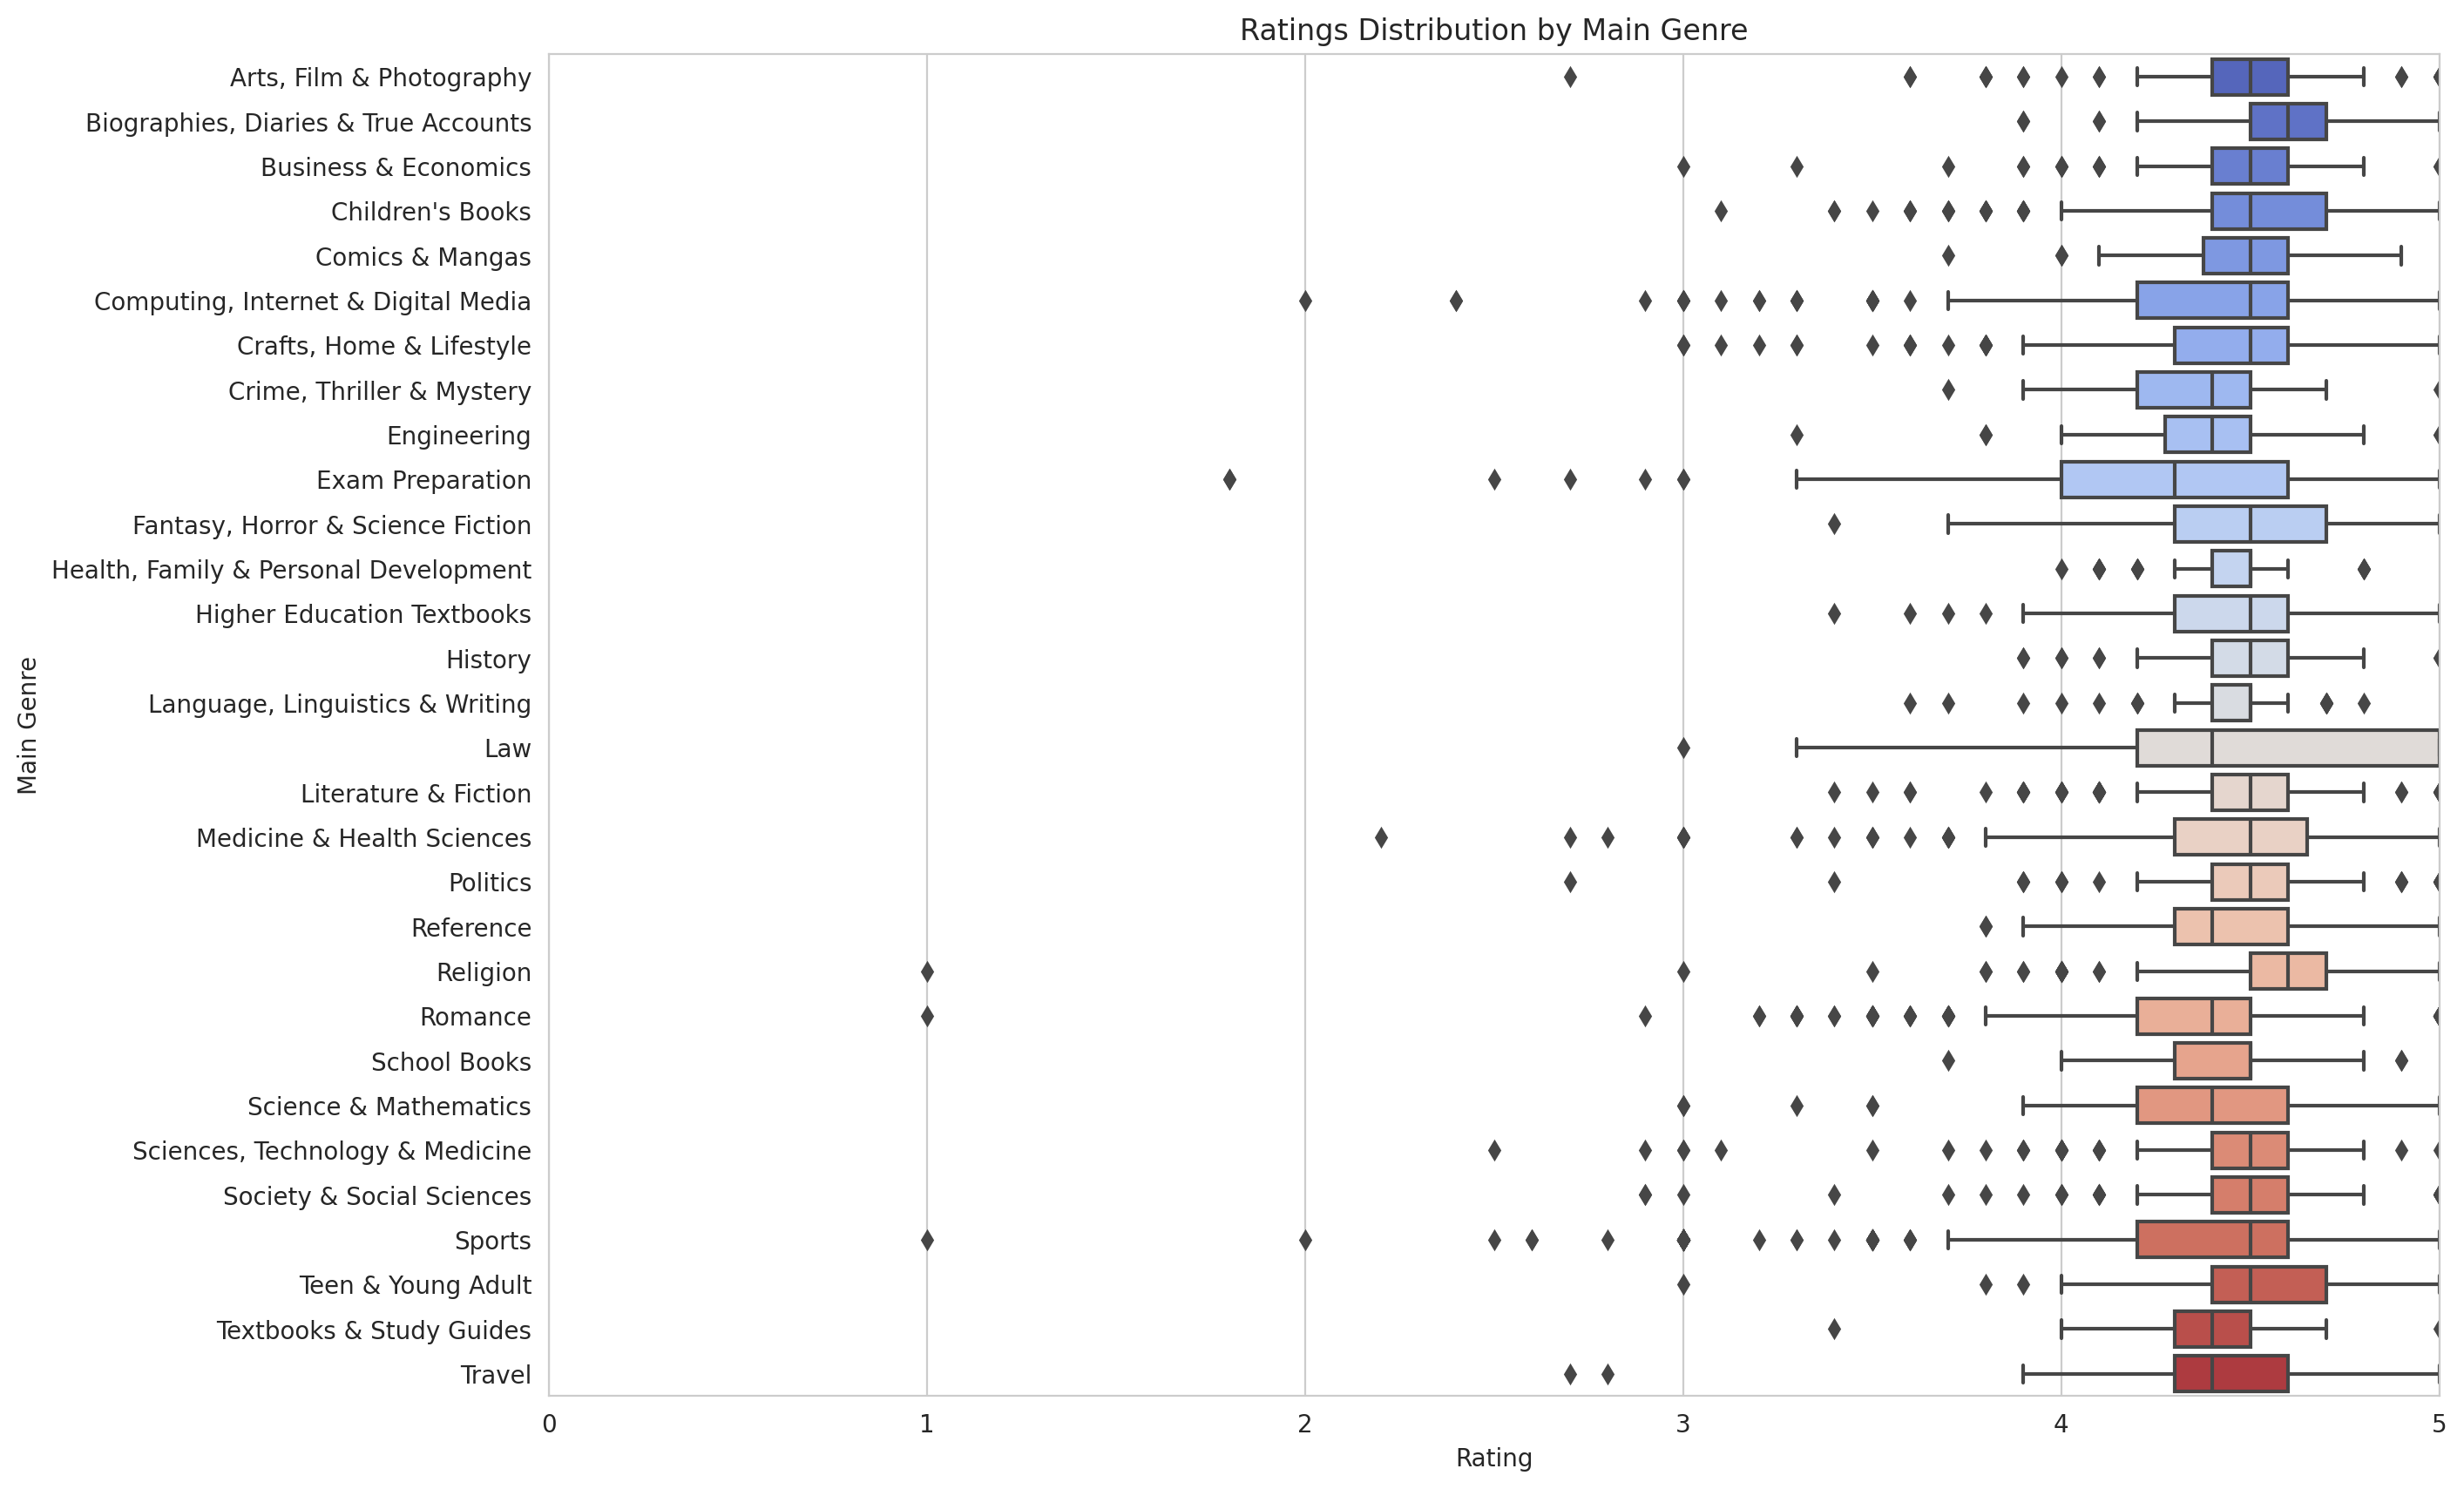

In [34]:
plt.figure(figsize=(14, 10), dpi=200)
sns.boxplot(y='Main Genre', x='Rating', data=df, palette="coolwarm")
plt.title('Ratings Distribution by Main Genre')
plt.xlabel('Rating')
plt.ylabel('Main Genre')
plt.xlim(0, 5)  # Ratings are on a scale from 0 to 5
plt.show()

In [35]:
# Adım 1: Ratingi yüksek olanlar
# Rating için eşik olarak 'Derecelendirilen Kişi Sayısı'nın 50. yüzdelik dilimini kullanma
significant_ratings_threshold = df['No. of People rated'].quantile(0.50)
filtered_books = df[df['No. of People rated'] >= significant_ratings_threshold]

In [36]:
# Adım 2: Her ana türdeki en yüksek puanlı kitabı belirleyin
top_books_per_genre = filtered_books.loc[filtered_books.groupby('Main Genre')['Rating'].idxmax()]
top_books_per_genre 

Title  \
31    Avatar: The Last Airbender The Art of the Anim...   
276   India's Most Fearless 2 : More Military Storie...   
302   Breakout Trading Made Easy: Maximize Your Prof...   
463                                 The Rabbit Listened   
1987                                Spy X Family: Vol.4   
2242      UNIX and Linux System Administration Handbook   
2443  Diary of Steve the Noob 12 (An Unofficial Mine...   
2680                                       SIX OF CROWS   
2706  Open Circuits: The Inner Beauty of Electronic ...   
2801  PW Physics Med Easy Notes | Notes, Formulas, M...   
3016                            JUJUTSU KAISEN, VOL. 20   
3063  Breakout Trading Made Easy: Maximize Your Prof...   
3193  Spreading Joy: How Joyalukkas Became the World...   
3370                   Discourses and Selected Writings   
3472  PUBLICATION MANUAL OF THE AMERICAN PSYCHOLOGIC...   
3502  IIBF�s International Trade Finance � Systemati...   
3708           Harry Potter and the Prisoner of Azkaban   
4017           Textbook of Neonatal Resuscitation (Nrp)   
4205            Savarkar: Echoes from a Forgotten Past,   
4401                    Shrimad Bhagwat Geeta Yatharoop   
4653  S ISLAMIC STORE original product - The Holy Qu...   
5278  A Court of Thorns and Roses Paperback Box Set ...   
6024  Oxford Student Atlas for India, Fourth Edition...   
6075  Dr. Cuterus : Everything Nobody Tells You Abou...   
6242  What We See in the Stars: An Illustrated Tour ...   
6484                                Women, Race & Class   
6689                                      The Glute Lab   
7495  Straight Up: Honest, Unfiltered, As-Real-As-I-...   
7845  SSB Interview: The Complete Guide, Second Edition   
7883  The Comfort Crisis: Embrace Discomfort T: Embr...   

                                     Author  \
31                  Michael Dante DiMartino   
276                 Shiv Aroor; Rahul Singh   
302                            Sunil Gurjar   
463                          Cori Doerrfeld   
1987                           Tatsuya Endo   
2242                             Evi Nemeth   
2443                         Steve the Noob   
2680                          Leigh Bardugo   
2706                        Eric Schlaepfer   
2801               Dr. Manish Raj (MR. Sir)   
3016                           Gege Akutami   
3063                           Sunil Gurjar   
3193                            Joy Alukkas   
3370                              Epictetus   
3472     American Psychological Association   
3502  Indian Institute of Banking & Finance   
3708                           J.K. Rowling   
4017                          Gary M Weiner   
4205                         Vikram Sampath   
4401   A.C. Bhaktivendanta Swami Prabhupada   
4653                                  Allah   
5278                          Sarah J. Maas   
6024                Oxford University Press   
6075                     Dr Tanaya Narendra   
6242                           Kelsey Oseid   
6484                        Angela Y. Davis   
6689                         Bret Contreras   
7495                          Trent Shelton   
7845                     Dr. N.K. Natarajan   
7883                         Michael Easter   

                                 Main Genre  \
31                 Arts, Film & Photography   
276    Biographies, Diaries & True Accounts   
302                    Business & Economics   
463                        Children's Books   
1987                        Comics & Mangas   
2242    Computing, Internet & Digital Media   
2443               Crafts, Home & Lifestyle   
2680              Crime, Thriller & Mystery   
2706                            Engineering   
2801                       Exam Preparation   
3016      Fantasy, Horror & Science Fiction   
3063  Health, Family & Personal Development   
3193             Higher Education Textbooks   
3370                                History   
3472        Language, Linguistics & Writing   
3502      

In [37]:
top_books_per_genre.to_csv('top_books_per_genre.csv', index=False)

In [38]:
# Görüntüleme için ilgili sütunların seçilmesi
top_books_display = top_books_per_genre[['Title', 'Author', 'Main Genre', 'Rating', 'No. of People rated']]

In [39]:
#Ture gore siralama
top_books_display_sorted = top_books_display.sort_values(by='Main Genre')
top_books_display_sorted

Title  \
31    Avatar: The Last Airbender The Art of the Anim...   
276   India's Most Fearless 2 : More Military Storie...   
302   Breakout Trading Made Easy: Maximize Your Prof...   
463                                 The Rabbit Listened   
1987                                Spy X Family: Vol.4   
2242      UNIX and Linux System Administration Handbook   
2443  Diary of Steve the Noob 12 (An Unofficial Mine...   
2680                                       SIX OF CROWS   
2706  Open Circuits: The Inner Beauty of Electronic ...   
2801  PW Physics Med Easy Notes | Notes, Formulas, M...   
3016                            JUJUTSU KAISEN, VOL. 20   
3063  Breakout Trading Made Easy: Maximize Your Prof...   
3193  Spreading Joy: How Joyalukkas Became the World...   
3370                   Discourses and Selected Writings   
3472  PUBLICATION MANUAL OF THE AMERICAN PSYCHOLOGIC...   
3502  IIBF�s International Trade Finance � Systemati...   
3708           Harry Potter and the Prisoner of Azkaban   
4017           Textbook of Neonatal Resuscitation (Nrp)   
4205            Savarkar: Echoes from a Forgotten Past,   
4401                    Shrimad Bhagwat Geeta Yatharoop   
4653  S ISLAMIC STORE original product - The Holy Qu...   
5278  A Court of Thorns and Roses Paperback Box Set ...   
6024  Oxford Student Atlas for India, Fourth Edition...   
6075  Dr. Cuterus : Everything Nobody Tells You Abou...   
6242  What We See in the Stars: An Illustrated Tour ...   
6484                                Women, Race & Class   
6689                                      The Glute Lab   
7495  Straight Up: Honest, Unfiltered, As-Real-As-I-...   
7845  SSB Interview: The Complete Guide, Second Edition   
7883  The Comfort Crisis: Embrace Discomfort T: Embr...   

                                     Author  \
31                  Michael Dante DiMartino   
276                 Shiv Aroor; Rahul Singh   
302                            Sunil Gurjar   
463                          Cori Doerrfeld   
1987                           Tatsuya Endo   
2242                             Evi Nemeth   
2443                         Steve the Noob   
2680                          Leigh Bardugo   
2706                        Eric Schlaepfer   
2801               Dr. Manish Raj (MR. Sir)   
3016                           Gege Akutami   
3063                           Sunil Gurjar   
3193                            Joy Alukkas   
3370                              Epictetus   
3472     American Psychological Association   
3502  Indian Institute of Banking & Finance   
3708                           J.K. Rowling   
4017                          Gary M Weiner   
4205                         Vikram Sampath   
4401   A.C. Bhaktivendanta Swami Prabhupada   
4653                                  Allah   
5278                          Sarah J. Maas   
6024                Oxford University Press   
6075                     Dr Tanaya Narendra   
6242                           Kelsey Oseid   
6484                        Angela Y. Davis   
6689                         Bret Contreras   
7495                          Trent Shelton   
7845                     Dr. N.K. Natarajan   
7883                         Michael Easter   

                                 Main Genre  Rating  No. of People rated  
31                 Arts, Film & Photography   4.900             1615.000  
276    Biographies, Diaries & True Accounts   4.800             2022.000  
302                    Business & Economics   4.800             1408.000  
463                        Children's Books   4.900             4309.000  
1987                        Comics & Mangas   4.900             5053.000  
2242    Computing, Internet & Digital Media   4.800              651.000  
2443               Crafts, Home & Lifestyle   4.900             2093.000  
2680              Crime, Thriller & Mystery   4.700            35302.000  
2706                            Engineering   4.800              704.000  
2801        

In [40]:
from plotly import express as exp
import plotly.express as px
# Type sütunundaki değerlerin sayısını alarak ilk 5'i seçiyoruz
type_counts = df['Type'].value_counts()

# Bar grafiği oluşturuyoruz
bar_type = px.bar(type_counts, 
                  x=type_counts.index, 
                  y=type_counts.values, 
                  labels={'index': 'Ciltleme Turu', 'y': 'Toplam Yayinlar'},
                  title='Yayinlarda Kullanilan Ciltleme Turu',
                  color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A'])

# Grafik düzenlemelerini yapıyoruz
bar_type.update_layout(showlegend=False, 
                       xaxis_title='Ciltleme Turu',
                       yaxis_title='Ciltlemeye Gore Toplam Yayinlar')

# Grafiği gösteriyoruz
bar_type.show()

In [41]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding uygulama
onehot_encoder = OneHotEncoder(sparse=False)  # sparse=False ile dense matris döner
main_genre_encoded = onehot_encoder.fit_transform(df[['Main Genre']])

# One-hot encoding sonuçlarını DataFrame'e dönüştürme
main_genre_df = pd.DataFrame(main_genre_encoded, columns=onehot_encoder.get_feature_names_out(['Main Genre']))
main_genre_df.head(20)
main_genre_df.shape

(7622, 30)

In [42]:
# Normal dağılımın sağlanması için Log transformation uygulanması
df['Price']=np.log1p(df['Price'])
df['Rating']=np.log1p(df['Rating'])
df['No. of People rated']=np.log1p(df['No. of People rated'])
df.head()


Title               Author  \
0              The Complete Novel of Sherlock Holmes   Arthur Conan Doyle   
1  Black Holes (L) : The Reith Lectures [Paperbac...      Stephen Hawking   
2                                    The Kite Runner      Khaled Hosseini   
3  Greenlights: Raucous stories and outlaw wisdom...  Matthew McConaughey   
4  The Science of Storytelling: Why Stories Make ...           Will Storr   

                 Main Genre           Sub Genre            Type  Price  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback  5.136   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback  4.605   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition  5.175   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback  5.966   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback  5.856   

   Rating  No. of People rated  \
0   1.686                9.900   
1   1.705                8.947   
2   1.723               10.820   
3   1.723               10.375   
4   1.705                7.443   

                                                URLs  
0  https://www.amazon.in/Complete-Novels-Sherlock...  
1  https://www.amazon.in/Black-Holes-Lectures-Ste...  
2  https://www.amazon.in/Kite-Runner-Khaled-Hosse...  
3  https://www.amazon.in/Greenlights-Raucous-stor...  
4  https://www.amazon.in/Science-Storytelling-Wil...

In [43]:
# Step 1: Feature Selection - Selecting Price, Rating, and No. of People rated for clustering
features = pd.concat([df[['Price', 'Rating', 'No. of People rated']], main_genre_df], axis=1)

In [44]:
features.shape

(7926, 33)

In [45]:
features.head(10)

Price  Rating  No. of People rated  Main Genre_Arts, Film & Photography  \
0  5.136   1.686                9.900                                1.000   
1  4.605   1.705                8.947                                1.000   
2  5.175   1.723               10.820                                1.000   
3  5.966   1.723               10.375                                1.000   
4  5.856   1.705                7.443                                1.000   
5  5.752   1.705                9.624                                1.000   
6  5.752   1.723                9.226                                1.000   
7  5.856   1.705                6.292                                1.000   
8  6.746   1.705                8.862                                1.000   
9  6.470   1.705                8.076                                1.000   

   Main Genre_Biographies, Diaries & True Accounts  \
0                                            0.000   
1                                            0.000   
2                                            0.000   
3                                            0.000   
4                                            0.000   
5                                            0.000   
6                                            0.000   
7                                            0.000   
8                                            0.000   
9                                            0.000   

   Main Genre_Business & Economics  Main Genre_Children's Books  \
0                            0.000                        0.000   
1                            0.000                        0.000   
2                            0.000                        0.000   
3                            0.000                        0.000   
4                            0.000                        0.000   
5                            0.000                        0.000   
6                            0.000                        0.000   
7                            0.000                        0.000   
8                            0.000                        0.000   
9                            0.000                        0.000   

   Main Genre_Comics & Mangas  Main Genre_Computing, Internet & Digital Media  \
0                       0.000                                           0.000   
1                       0.000                                           0.000   
2                       0.000                                           0.000   
3                       0.000                                           0.000   
4                       0.000                                           0.000   
5                       0.000                                           0.000   
6                       0.000                                           0.000   
7                       0.000                                           0.000   
8                       0.000                                           0.000   
9                       0.000                                           0.000   

   Main Genre_Crafts, Home & Lifestyle  Main Genre_Crime, Thriller & Mystery  \
0                                0.000                                 0.000   
1                                0.000                                 0.000   
2                                0.000                                 0.000   
3                                0.000                                 0.000   
4                                0.000                                 0.000   
5                                0.000                                 0.000   
6                                0.000                                 0.000   
7                                0.000                                 0.000   
8                                0.000                                 0.000   
9                                0.000                                 0.000   

   Main Genre_Engineering  Main Genre_

In [46]:
from sklearn.preprocessing import MinMaxScaler
# Step 2: Data Preprocessing - Normalizing the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [47]:
# `features_scaled` dizisinde `NaN` olan satırları kaldırma
# Eğer `features_scaled` bir pandas DataFrame ise:
if isinstance(features_scaled, pd.DataFrame):
    features_scaled = features_scaled.dropna()
# Eğer `features_scaled` bir numpy array ise:
elif isinstance(features_scaled, np.ndarray):
    # `NaN` olan satırları tespit etme
    nan_mask = np.isnan(features_scaled).any(axis=1)
    features_scaled = features_scaled[~nan_mask]

print(features_scaled)

[[0.48926682 0.90409673 0.74070281 ... 0.         0.         0.        ]
 [0.43861788 0.92079883 0.66407883 ... 0.         0.         0.        ]
 [0.49298347 0.93719998 0.81475576 ... 0.         0.         0.        ]
 ...
 [0.5914735  0.92079883 0.3540463  ... 0.         0.         1.        ]
 [0.73417989 0.96914148 0.40831825 ... 0.         0.         1.        ]
 [0.67468431 0.96914148 0.32805437 ... 0.         0.         1.        ]]


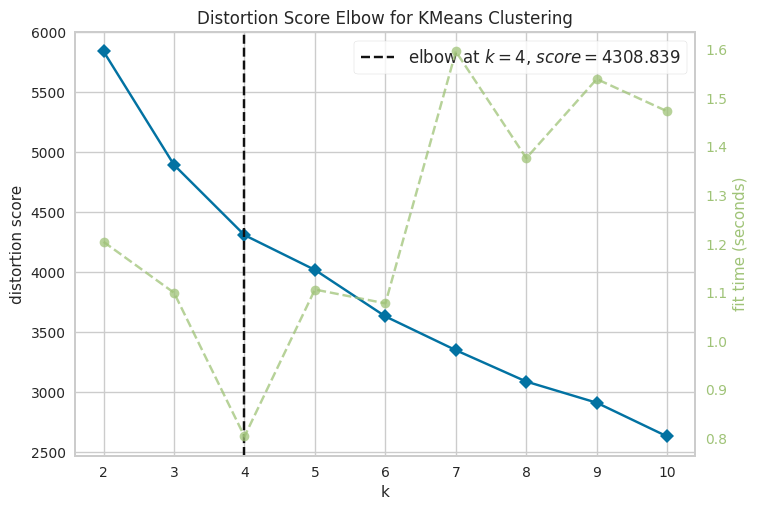

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Elbow yöntemi ile en uygun k sayısını bulma
kmeans = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0)
elbow = KElbowVisualizer(kmeans, k=10)
elbow.fit(features_scaled)
elbow.show()

In [49]:
# Apply K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

In [50]:
# Visualization preparation - Dimensionality reduction with PCA for a 2D plot
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

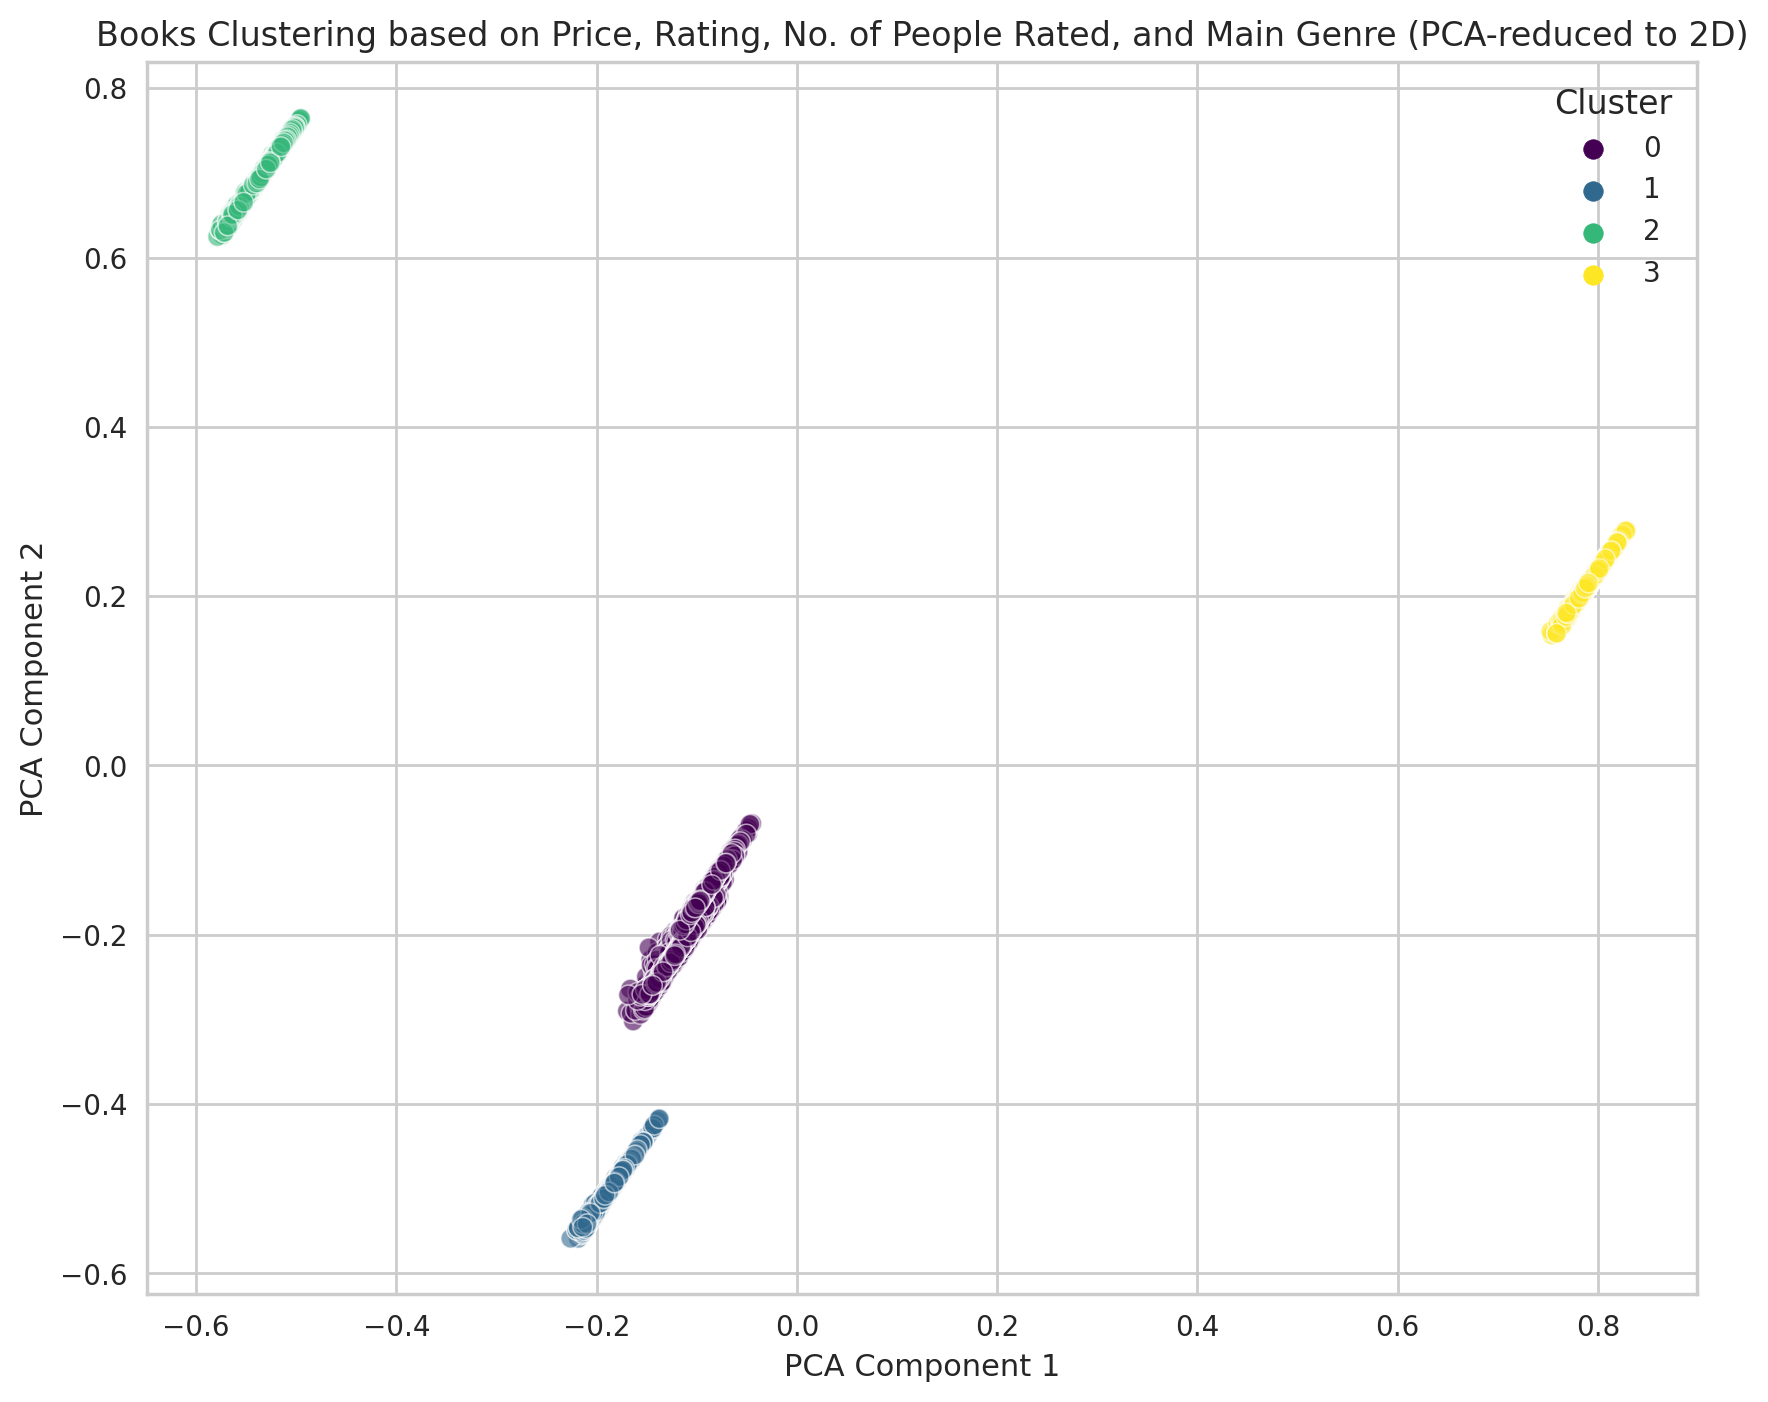

In [52]:
plt.figure(figsize=(10, 8), dpi=200)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.6)
plt.title('Books Clustering based on Price, Rating, No. of People Rated, and Main Genre (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process

def find_similar_books(book_title, df, features_pca, top_n=5, genre=None, sub_genre=None):
    # Filtreleme işlemleri
    if genre:
        genre_df = df[df['Main Genre'] == genre]
        genre_indices = genre_df.index
        features_pca = features_pca[genre_indices]
    else:
        genre_df = df
    
    if sub_genre:
        genre_df = genre_df[genre_df['Sub Genre'] == sub_genre]
        genre_indices = genre_df.index
        features_pca = features_pca[genre_indices]

    # Kısmi eşleşmeyi bul ve en yakın başlığı seç
    titles = genre_df['Title'].tolist()
    best_match = process.extractOne(book_title.strip(), titles)
    
    if best_match is None or best_match[1] < 80:  # Benzerlik skoru eşiği
        raise ValueError(f"'{book_title}' kitabı veri setinde bulunmuyor.")

    matched_title = best_match[0]
    idx = genre_df[genre_df['Title'] == matched_title].index[0]
    
    # Cosine benzerlik hesapla
    cosine_sim = cosine_similarity(features_pca)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    
    book_indices = [i[0] for i in sim_scores]
    similar_books = genre_df.iloc[book_indices]
    
     # İlk kitabı önerilenlerden çıkararak tekrarını engelleme
    book_indices = [i[0] for i in sim_scores if genre_df.iloc[i[0]]['Title'] != matched_title][:top_n]
    similar_books = genre_df.iloc[book_indices]
    
    # Tekrar eden başlıkları kaldır
    unique_books = similar_books.drop_duplicates(subset='Title', keep='first')
    
    # Alt türlere göre filtreleme
    filtered_books = unique_books.groupby('Sub Genre').first().reset_index()
      
    return filtered_books


In [54]:
book_title = "Lord of the Flies"
similar_books = find_similar_books(book_title, df, features_pca)

print(f"'{book_title}' kitabını alan kullanıcıya önerilen kitaplar:")
print(similar_books[['Title', 'Author','Main Genre', 'Sub Genre']])

'Lord of the Flies' kitabını alan kullanıcıya önerilen kitaplar:
                                               Title                  Author  \
0  My First Pop-Up Fairy Tales - Three Little Pig...      Wonder House Books   
1               Geronimo Stilton # 52 Mouse in Space        GERONIMO STILTON   
2  201 Amazing Activity Book - Fun Activities and...      Wonder House Books   
3  Phonics Reader 5 Books Pack for Children Age 3...  Dreamland Publications   

         Main Genre               Sub Genre  
0  Children's Books          Animals & Pets  
1  Children's Books  Computers & Technology  
2  Children's Books   Education & Reference  
3  Children's Books       Language Learning  


In [60]:
import requests

def get_weather(api_key, city):
    base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(base_url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return None

def suggest_books_by_weather(weather_condition, book_format='text'):
    recommendations = {
        'Clear': {
            'text': ['The Alchemist by Paulo Coelho', 'To Kill a Mockingbird by Harper Lee'],
            'audio': ['Becoming by Michelle Obama (Audiobook)', 'Educated by Tara Westover (Audiobook)']
        },
        'Rain': {
            'text': ['The Girl with the Dragon Tattoo by Stieg Larsson', 'Gone Girl by Gillian Flynn'],
            'audio': ['The Silent Patient by Alex Michaelides (Audiobook)', 'Big Little Lies by Liane Moriarty (Audiobook)']
        },
        'Snow': {
            'text': ['Harry Potter Series by J.K. Rowling', 'The Hobbit by J.R.R. Tolkien'],
            'audio': ['A Game of Thrones by George R.R. Martin (Audiobook)', 'The Lion, the Witch and the Wardrobe by C.S. Lewis (Audiobook)']
        },
        'Clouds': {
            'text': ['The Catcher in the Rye by J.D. Salinger', '1984 by George Orwell'],
            'audio': ['The Great Gatsby by F. Scott Fitzgerald (Audiobook)', 'The Handmaid\'s Tale by Margaret Atwood (Audiobook)']
        }
    }
    return recommendations.get(weather_condition, {'text': ['Pride and Prejudice by Jane Austen', 'Moby Dick by Herman Melville'],
                                                   'audio': ['The Odyssey by Homer (Audiobook)', 'Jane Eyre by Charlotte Bronte (Audiobook)']}).get(book_format)

# Kullanıcıdan API anahtarı ve şehir bilgisini alma
api_key = '9b0d2c746a9ee16b19a569fa9a2d05a8'  # OpenWeatherMap API anahtarınızı buraya yazın
city = input("Hava durumu için şehir adı girin: ")

# Hava durumu verisini alma
weather_data = get_weather(api_key, city)

if weather_data:
    weather_condition = weather_data['weather'][0]['main']
    print(f"Hava durumu: {weather_condition}")
    # Hava durumuna göre kitap önerisi
    book_format = input("Kitap formatı (text/audio) seçin: ").strip().lower()
    recommendations = suggest_books_by_weather(weather_condition, book_format)
    print(f"Önerilen kitaplar: {recommendations}")
else:
    print("Hava durumu verisi alınamadı. Lütfen API anahtarınızı ve şehir adını kontrol edin.")


Hava durumu için şehir adı girin:  Malta


Hava durumu: Clouds


Kitap formatı (text/audio) seçin:  text


Önerilen kitaplar: ['The Catcher in the Rye by J.D. Salinger', '1984 by George Orwell']


In [56]:
csv_dosyasi = 'output.csv'
features.to_csv(csv_dosyasi, index=False)